In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
import statistics
%matplotlib inline
import random
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)



In [4]:

DF_1 = pd.read_csv('application_data.csv')

In [5]:
DF_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
DF_1.shape

(307511, 122)

In [7]:
DF_1.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [8]:
DF_1.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [9]:
DF_1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

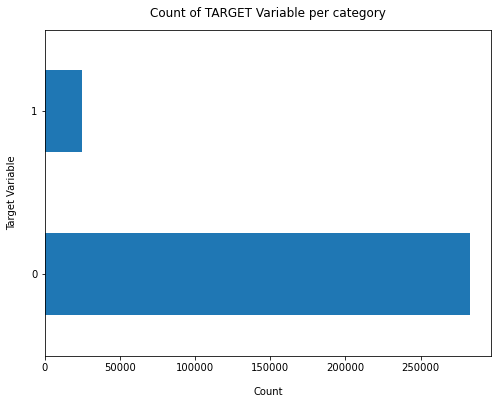

In [10]:
DF_1['TARGET'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [11]:
100*DF_1['TARGET'].value_counts()/len(DF_1['TARGET'])

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


Data is highly imbalanced, ratio = 92:8
So we analyse the data with other features while taking the target values separately to get some insights.

In [12]:
DF_1['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [13]:
DF_1.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


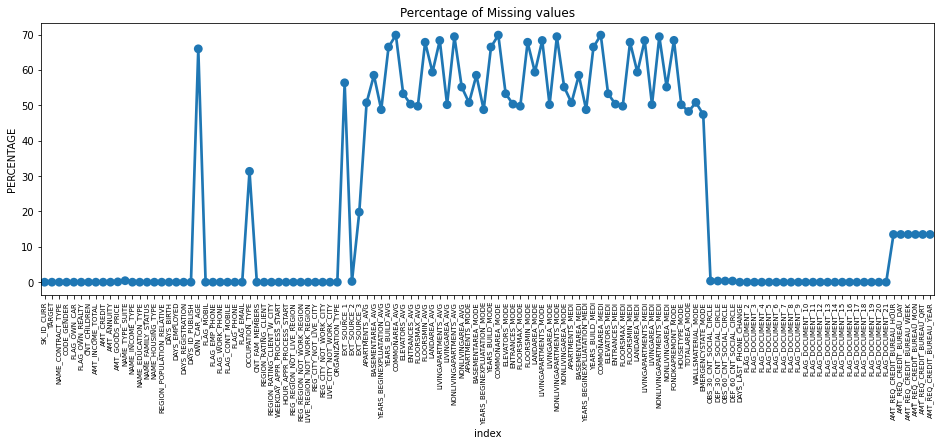

In [14]:
missing = pd.DataFrame((DF_1.isnull().sum())*100/DF_1.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [15]:
DF = DF_1.copy()

In [16]:
DF.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [17]:

null_count=round(100*(DF.isnull().sum()/len(DF.index)),2)
null_count


SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [18]:
null_count=null_count[null_count>=40]
null_count

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

In [19]:
len(null_count)

49

In [20]:
cols_dropped=([null_count[null_count >=50.00].index])
DF.drop(labels=cols_dropped[0],axis=1,inplace=True)


In [21]:
DF.shape

(307511, 81)

In [22]:
100*(DF.isnull().sum()/len(DF.index))

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [23]:
Drop_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE', 
'DEF_60_CNT_SOCIAL_CIRCLE', 
'AMT_REQ_CREDIT_BUREAU_HOUR', 
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',     
'AMT_REQ_CREDIT_BUREAU_MON',   
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR']
DF.drop(labels=Drop_col,axis=1,inplace=True)

In [149]:
len(Drop_col)

51

In [24]:
100*(DF.isnull().sum()/len(DF.index))

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCES

# Missing Value Treatement

AMT_ANNUITY 

In [25]:
DF.AMT_ANNUITY.isnull().sum()

12

In [26]:
#Percentage of missing values in "AMT_ANNUITY" column
float(100*(12/307511))
0.003902299429939092

0.003902299429939092

We can see that 'AMT_ANNUITY' column is having very less percentage of null values and is also a numeric data.We can impute mode here.These values can be imputed by the mean of the complete cases of the variable. Since this column is also having an outlier which is very large we can impute missing values with Median.

In [27]:
DF.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [28]:
DF.AMT_ANNUITY.median()

24903.0

In [29]:
DF.AMT_ANNUITY.fillna(24903.0, inplace = True)

AMT_GOODS_PRICE

In [30]:
DF.AMT_GOODS_PRICE.isnull().sum()

278

In [31]:
#Percentage of missing values in "AMT_GOODS_PRICE" column
float(100*(278/307511))


0.09040327012692229

We can see that 'AMT_GOODS_PRICE' column is having very less percentage of null values and is also a numeric data.We can impute mode here.These values can be imputed by the mean of the complete cases of the variable. Since this column is also having an outlier which is very large we can impute missing values with Median.

In [32]:
DF['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [33]:
DF.AMT_GOODS_PRICE.median()

450000.0

In [34]:
DF.AMT_GOODS_PRICE.fillna(450000.0 , inplace = True)

EXT_SOURCE_2 

In [35]:
DF.EXT_SOURCE_2.isnull().sum()

660

In [36]:
float(100*(660/307511))

0.21462646864665005

In [37]:
DF.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

The null value is very low. And mean and median also near by 0 .So we can impute with 0

In [38]:
DF.EXT_SOURCE_2.fillna(0.0, inplace = True)

NAME_TYPE_SUITE 

In [39]:
DF.NAME_TYPE_SUITE.isnull().sum()

1292

In [40]:
float(100*(1292/307511))

0.42014757195677555

In [41]:
DF.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

Here the null value is .420 .So here we can impute with the mode

In [42]:
DF.NAME_TYPE_SUITE.fillna('Unaccompanied' ,inplace = True)

OCCUPATION_TYPE

In [43]:
DF.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [44]:
DF.OCCUPATION_TYPE.fillna('Laborers' ,inplace = True)

In [45]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [46]:
DF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,0.622246
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.555912
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738


In [47]:
DF.nunique().sort_values()


LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_NOT_WORK_REGION         2
REG_REGION_NOT_WORK_REGION          2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_WORK_CITY              2
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
NAME_TYPE_SUITE                     7
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PROCESS_START            24
ORGANIZATION_TYPE                  58
REGION_POPULATION_RELATIVE         81
AMT_GOODS_PRICE                  1002
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
DAYS_ID_PUBL

Remove XNA values

In [48]:
DF['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [49]:
DF.loc[DF['CODE_GENDER']=='XNA','CODE_GENDER']='F'
DF['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [50]:
DF['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

Here  55374 having XNA value ..so we can drop the values

In [51]:
DF.loc[DF['ORGANIZATION_TYPE']=='XNA','ORGANIZATION_TYPE']='F'
DF['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
F                         55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [52]:
#changing negative ages to positive ages.
DF['DAYS_BIRTH']=abs(DF['DAYS_BIRTH'])
DF['DAYS_BIRTH'].describe()


count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [53]:
#changing negative values in days to positive days
DF['DAYS_EMPLOYED']=abs(DF['DAYS_EMPLOYED'])
DF['DAYS_EMPLOYED'].describe()


count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [54]:
DF['DAYS_ID_PUBLISH']=abs(DF['DAYS_ID_PUBLISH'])
DF['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [55]:
DF['DAYS_REGISTRATION']=abs(DF['DAYS_REGISTRATION'])
DF['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [56]:
bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

DF['AMT_CREDIT_RANGE']=pd.cut(DF['AMT_CREDIT'],bins=bins,labels=slots)

In [57]:
bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']

DF['AMT_INCOME_RANGE']=pd.cut(DF['AMT_INCOME_TOTAL'],bins,labels=slot)


In [58]:
bins = [0,7300,10950,14600,18250,21900,25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

DF['AGE_RANGE']=pd.cut(DF['DAYS_BIRTH'],bins,labels=slot)

In [59]:
DF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,Medium,Medium,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,0.622246,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.555912,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,Medium,Low,50-60


# UNIVARIATE DATA

In [60]:
categorical_data= DF.select_dtypes(include=object).columns
categorical_data

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [61]:
target_1 = DF[DF['TARGET']==1]
target_0 = DF[DF['TARGET']==0]

OCCUPATION_TYPE

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


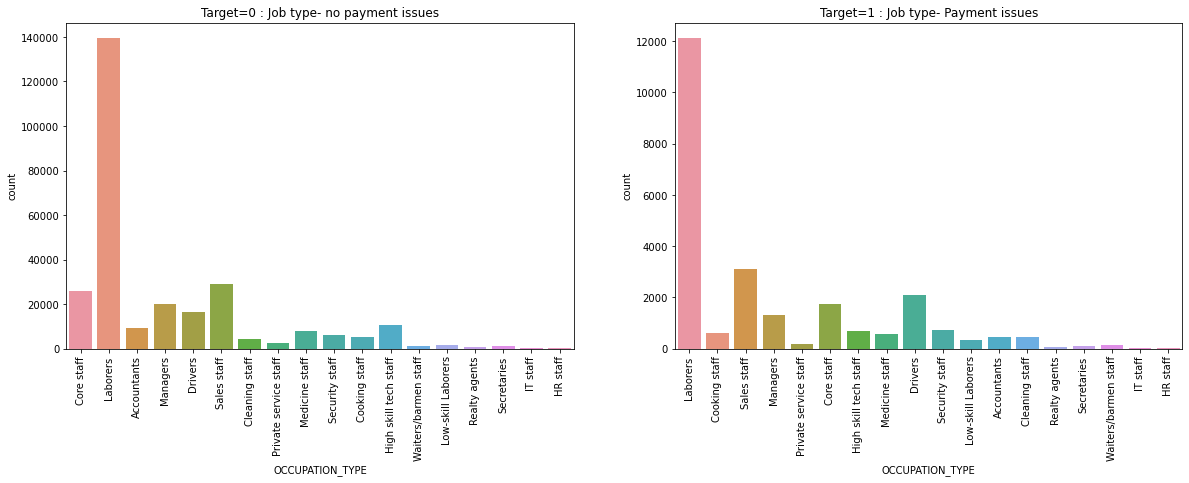

In [62]:
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)



sns.countplot(target_0['OCCUPATION_TYPE'])


plt.title('Target=0 : Job type- no payment issues')


plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['OCCUPATION_TYPE'])
plt.title('Target=1 : Job type- Payment issues')
plt.xticks(rotation = 90) 
plt.show()


Labourers have high repayement percentage.
Low skill labores ,Sales staff, core staff, drivers, especially people with less income range are the most likely to be loan defaulters than highly paid staffs and accountants.
Better the occupation, lesser the chance of defaulting.

NAME_INCOME_TYPE

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


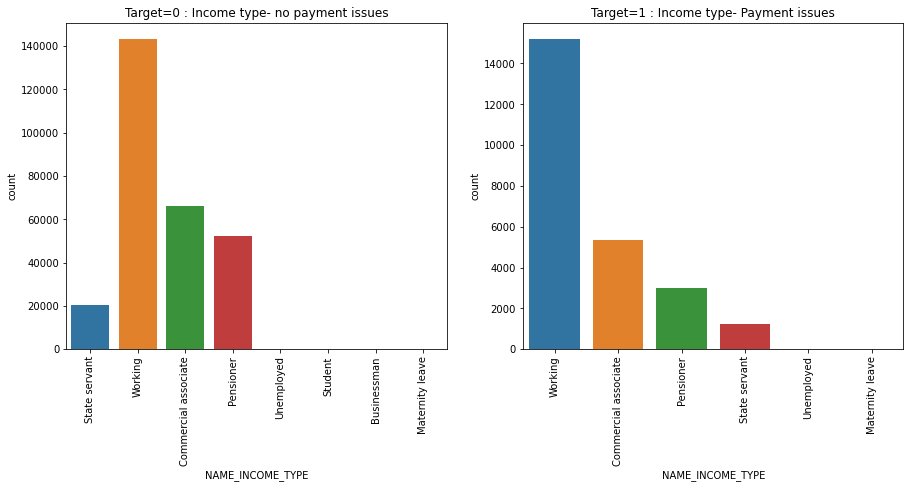

In [63]:
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)


sns.countplot(target_0['NAME_INCOME_TYPE'])
plt.title('Target=0 : Income type- no payment issues')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_INCOME_TYPE'])
plt.title('Target=1 : Income type- Payment issues')

plt.xticks(rotation = 90)
plt.show()


Working customers can be targetted to lend loans as they have higher percentage of making payments on time.

commercial associates, state servants and pensioners are fairly more reliable.

NAME_CONTRACT_TYPE

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


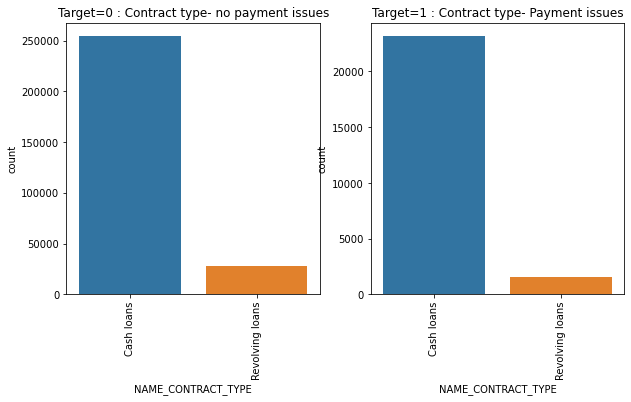

In [64]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)

sns.countplot(target_0['NAME_CONTRACT_TYPE'])

plt.title('Target=0 : Contract type- no payment issues')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_CONTRACT_TYPE'])
plt.title('Target=1 : Contract type- Payment issues')

plt.xticks(rotation = 90)
plt.show()


The most cash loan are not repayed as compare to revolving loans

NAME_EDUCATION_TYPE

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


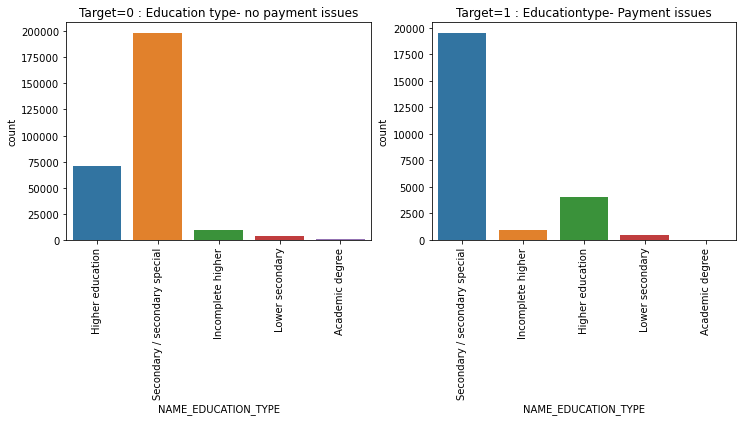

In [65]:
plt.figure(figsize = (12,4))
plt.subplot(1, 2, 1)

sns.countplot(target_0['NAME_EDUCATION_TYPE'])

plt.title('Target=0 : Education type- no payment issues')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_EDUCATION_TYPE'])
plt.title('Target=1 : Educationtype- Payment issues')

plt.xticks(rotation = 90)
plt.show()


Customers with secondary education are most likely to make payments when compared to customers with higher education.

NAME_FAMILY_STATUS

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


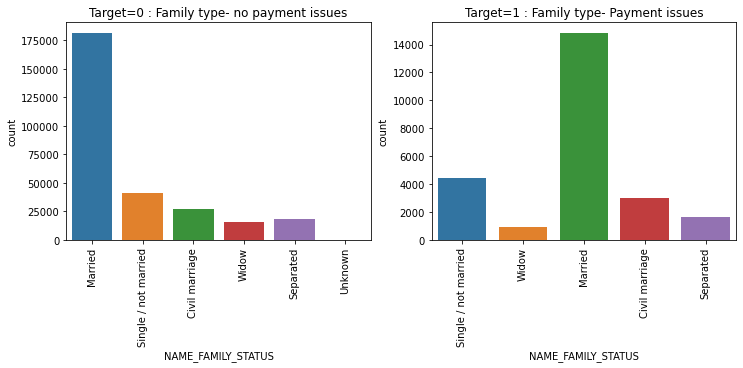

In [66]:
plt.figure(figsize = (12,4))
plt.subplot(1, 2, 1)

sns.countplot(target_0['NAME_FAMILY_STATUS'])

plt.title('Target=0 : Family type- no payment issues')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_FAMILY_STATUS'])
plt.title('Target=1 : Family type- Payment issues')

plt.xticks(rotation = 90)
plt.show()

Most married customers are repaying there loans.Civil marraiges and single people have higher chances of defaulting than others.

ORGANIZATION_TYPE

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


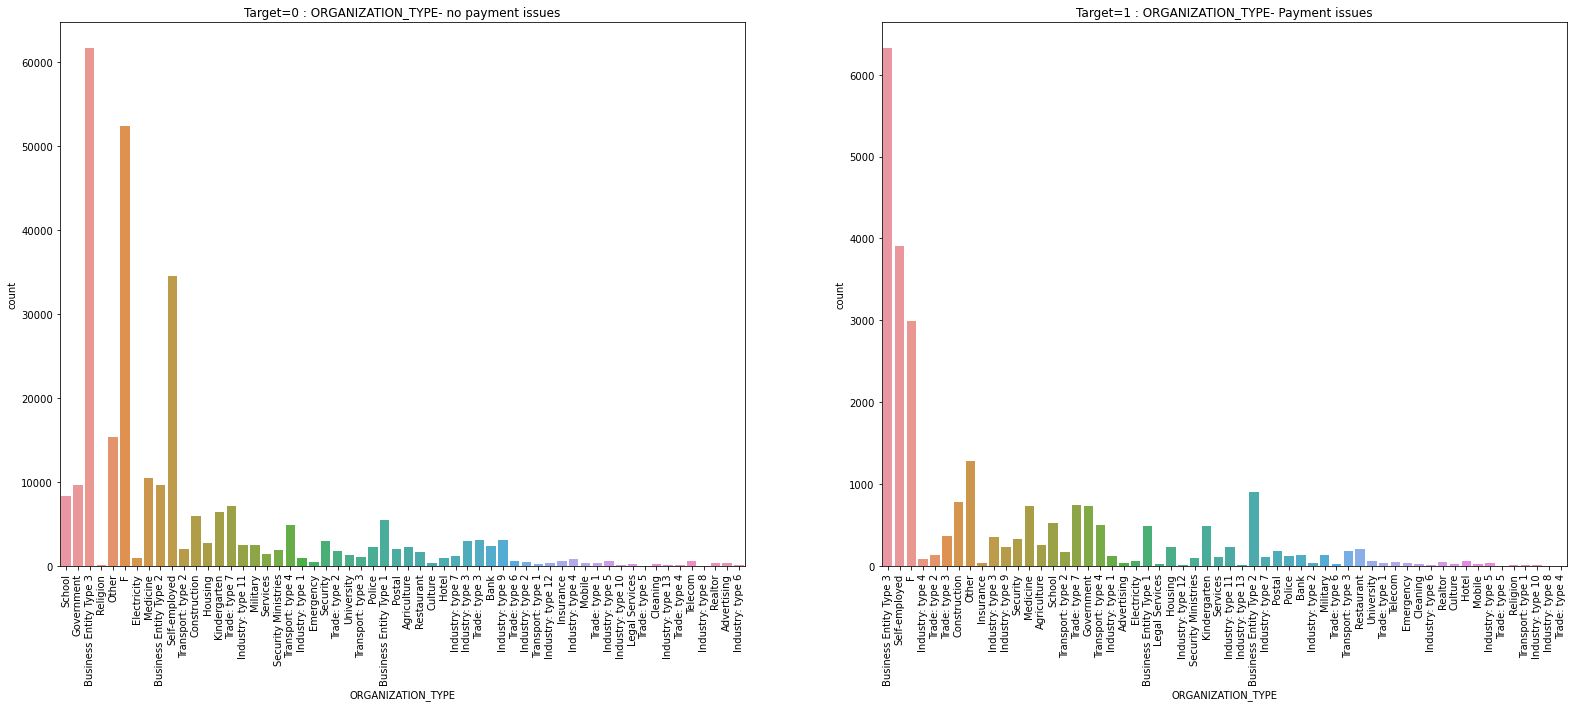

In [67]:
plt.figure(figsize = (27,10))
plt.subplot(1, 2, 1)

sns.countplot(target_0['ORGANIZATION_TYPE'])


plt.title('Target=0 : ORGANIZATION_TYPE- no payment issues')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['ORGANIZATION_TYPE'])
plt.title('Target=1 : ORGANIZATION_TYPE- Payment issues')

plt.xticks(rotation = 90)
plt.show()

Some oraganization type like businessentry type2 have some payment problem compare to other type such as business entry 3 .

WEEKDAY_APPR_PROCESS_START

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


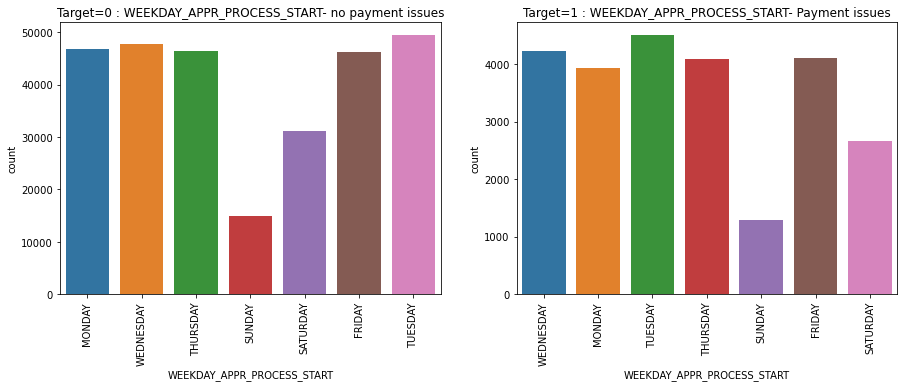

In [68]:
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)

sns.countplot(target_0['WEEKDAY_APPR_PROCESS_START'])


plt.title('Target=0 : WEEKDAY_APPR_PROCESS_START- no payment issues')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['WEEKDAY_APPR_PROCESS_START'])
plt.title('Target=1 : WEEKDAY_APPR_PROCESS_START- Payment issues')

plt.xticks(rotation = 90)
plt.show()

Weekdays are more common days for loan application but it doesn't give any insight for defaulters.

More pepole are applyed on weekdays.

NAME_TYPE_SUITE

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


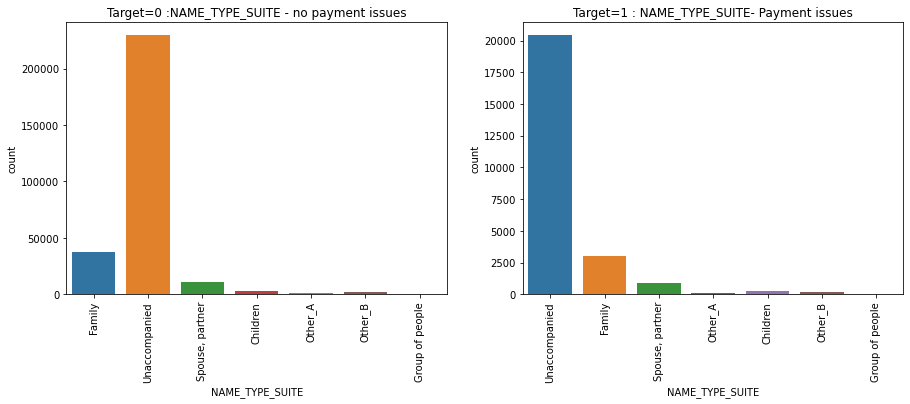

In [69]:
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)

sns.countplot(target_0['NAME_TYPE_SUITE'])


plt.title('Target=0 :NAME_TYPE_SUITE - no payment issues')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_TYPE_SUITE'])
plt.title('Target=1 : NAME_TYPE_SUITE- Payment issues')

plt.xticks(rotation = 90)
plt.show()

Here most pepole are came  unaccompanied , they are reliable too.Peoples are coming with patner and children have higher chances of defaulting than others

CODE_GENDER
        

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


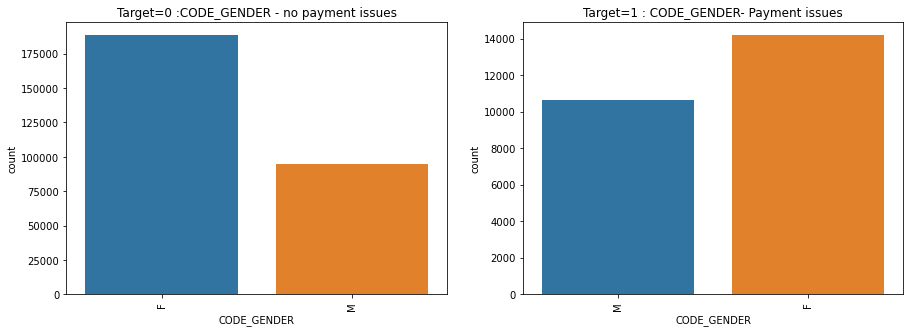

In [70]:
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)

sns.countplot(target_0['CODE_GENDER'])


plt.title('Target=0 :CODE_GENDER - no payment issues')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['CODE_GENDER'])
plt.title('Target=1 : CODE_GENDER- Payment issues')

plt.xticks(rotation = 90)
plt.show()

Here female are more reliable compare to male

FLAG_OWN_CAR

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


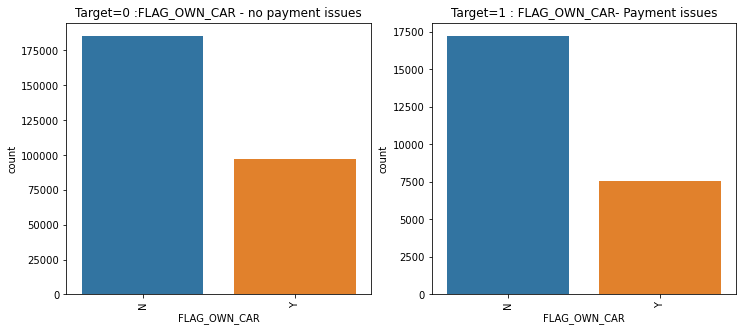

In [71]:
plt.figure(figsize = (12,5))
plt.subplot(1, 2, 1)

sns.countplot(target_0['FLAG_OWN_CAR'])


plt.title('Target=0 :FLAG_OWN_CAR - no payment issues')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['FLAG_OWN_CAR'])
plt.title('Target=1 : FLAG_OWN_CAR- Payment issues')

plt.xticks(rotation = 90)
plt.show()

Customers having own cars less likely to not repay the loan.

FLAG_OWN_REALTY

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


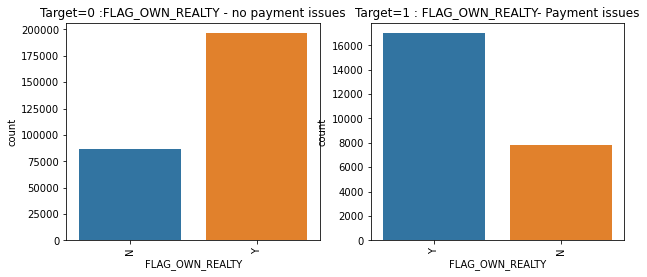

In [72]:
plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)

sns.countplot(target_0['FLAG_OWN_REALTY'])


plt.title('Target=0 :FLAG_OWN_REALTY - no payment issues')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['FLAG_OWN_REALTY'])
plt.title('Target=1 : FLAG_OWN_REALTY- Payment issues')

plt.xticks(rotation = 90)
plt.show()

both are paying the loan and less percentange customers are not repaying..so here no good insight.

NAME_HOUSING_TYPE

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


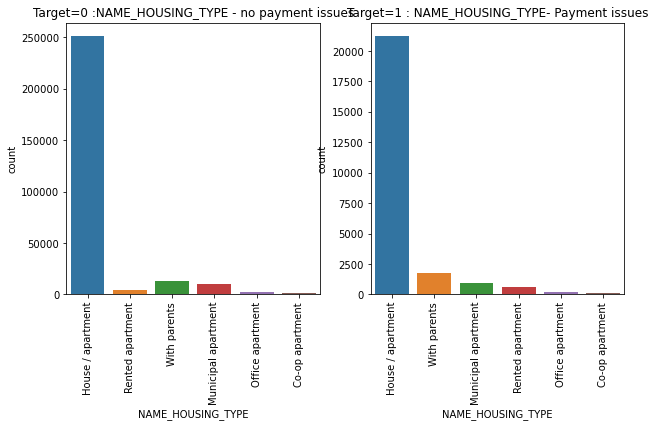

In [73]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)

sns.countplot(target_0['NAME_HOUSING_TYPE'])


plt.title('Target=0 :NAME_HOUSING_TYPE - no payment issues')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_HOUSING_TYPE'])
plt.title('Target=1 : NAME_HOUSING_TYPE- Payment issues')

plt.xticks(rotation = 90)
plt.show()

Most pepole living in house/ apartment ,they are more reliable compare to pepole who living with parents and rented apartment.

# categorical data vs target ,gender

In [74]:
def uniplot(DF,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(DF[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = DF, x= col, order=DF[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

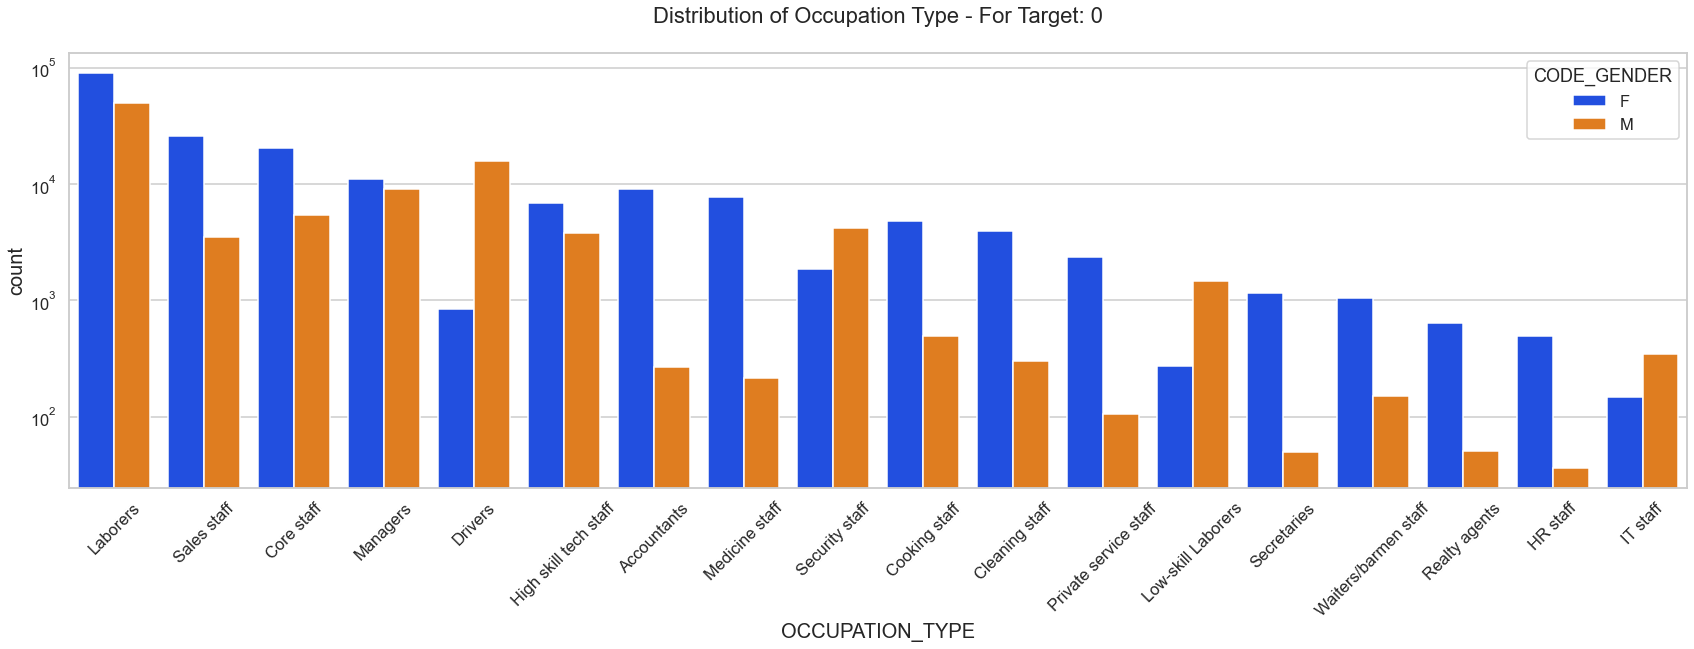

In [75]:
uniplot(target_0,col='OCCUPATION_TYPE',title='Distribution of Occupation Type - For Target: 0',hue='CODE_GENDER')

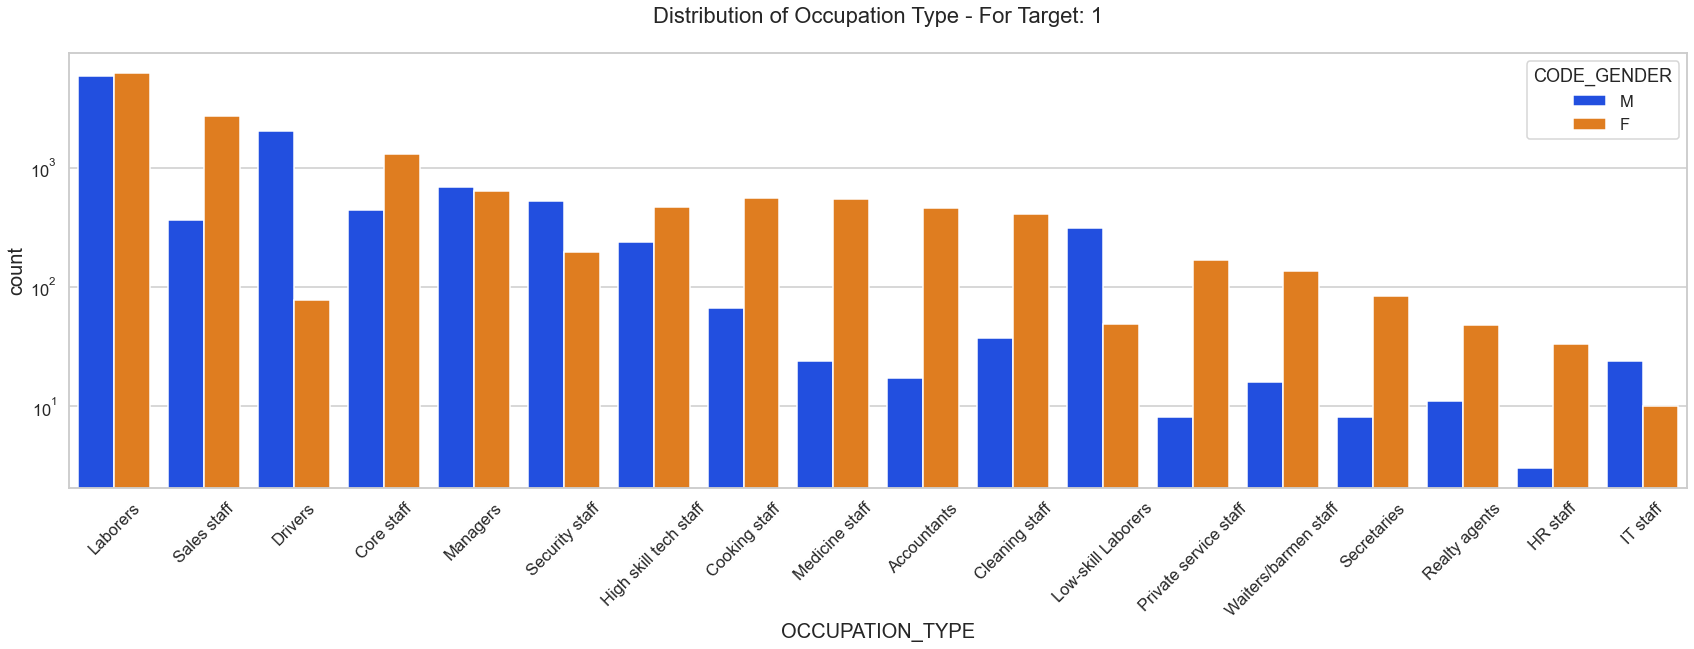

In [76]:
uniplot(target_1,col='OCCUPATION_TYPE',title='Distribution of Occupation Type - For Target: 1',hue='CODE_GENDER')


<AxesSubplot:xlabel='CODE_GENDER', ylabel='OCCUPATION_TYPE'>

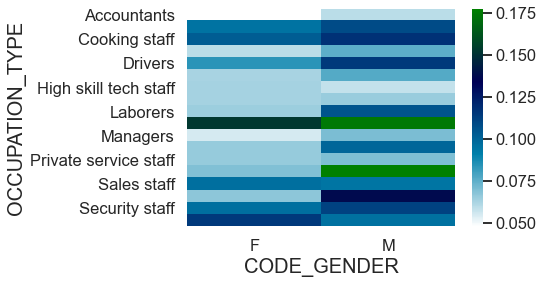

In [77]:

res = pd.pivot_table(data=DF, index='OCCUPATION_TYPE', columns='CODE_GENDER', values = 'TARGET')
sns.heatmap(res, annot=False, cmap="ocean_r")

 Gender vs Occupation Type Analysis against Target variable:

Female with Occupation type: Accountants,Medicine staff,  Private Service Staff ,HR staff,cleaning staff and etc professions are the most defaulters as compared to males.
Male Drivers , Security staff and ,low skill labourers have also high default rate
Good insights
.Female under occupation with Accountants, Private Service Staff, Medicine staff ,Secretaries, Realty Agents, HR Staff etc are the most defaulted sub categories against their male counter parts.
. Male under occupation with Securitystaff, Low Skilled Labourers, Drivers etc are the most defaulted sub categories against their female counter parts.

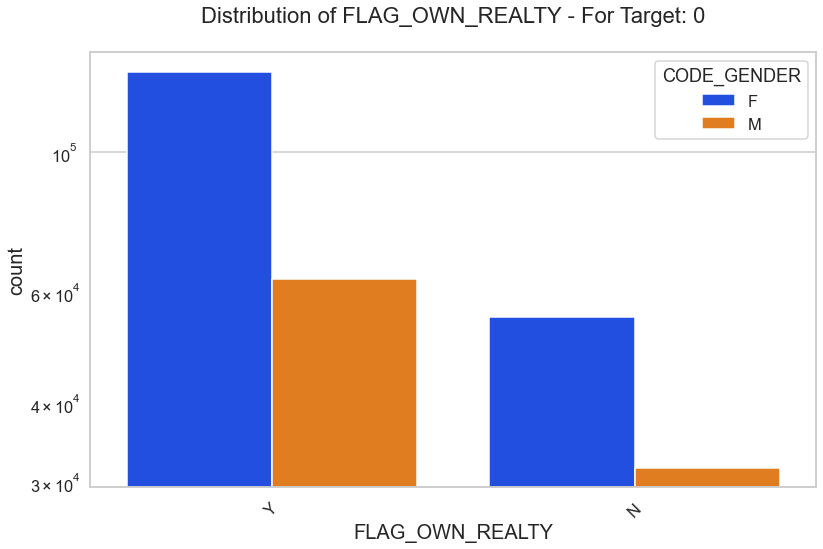

In [78]:
uniplot(target_0,col='FLAG_OWN_REALTY',title='Distribution of FLAG_OWN_REALTY - For Target: 0',hue='CODE_GENDER')

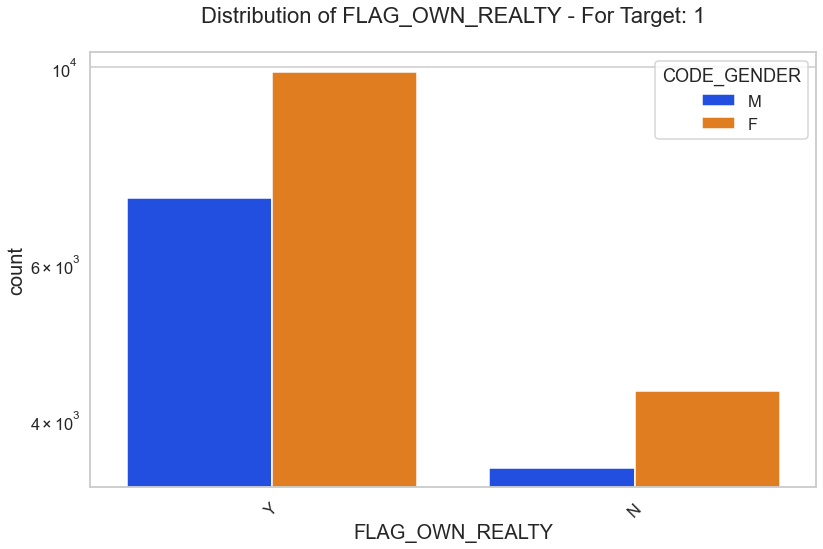

In [79]:
uniplot(target_1,col='FLAG_OWN_REALTY',title='Distribution of FLAG_OWN_REALTY - For Target: 1',hue='CODE_GENDER')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='FLAG_OWN_REALTY'>

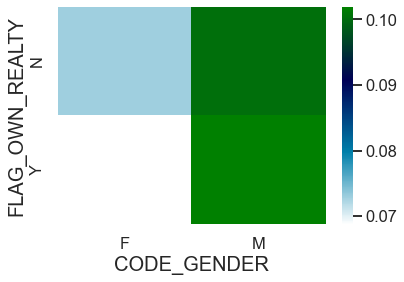

In [80]:
res = pd.pivot_table(data=DF, index='FLAG_OWN_REALTY', columns='CODE_GENDER', values = 'TARGET')
sns.heatmap(res, annot=False, cmap="ocean_r")

As per the heatmap male clients they  have own flat or no own flat they are highest default rate as compared to other 2 sub categories.

If we cosider bar plot Female clients they have own flat they are the  most defaulters as compared to male clients
 


FLAG_OWN_CAR

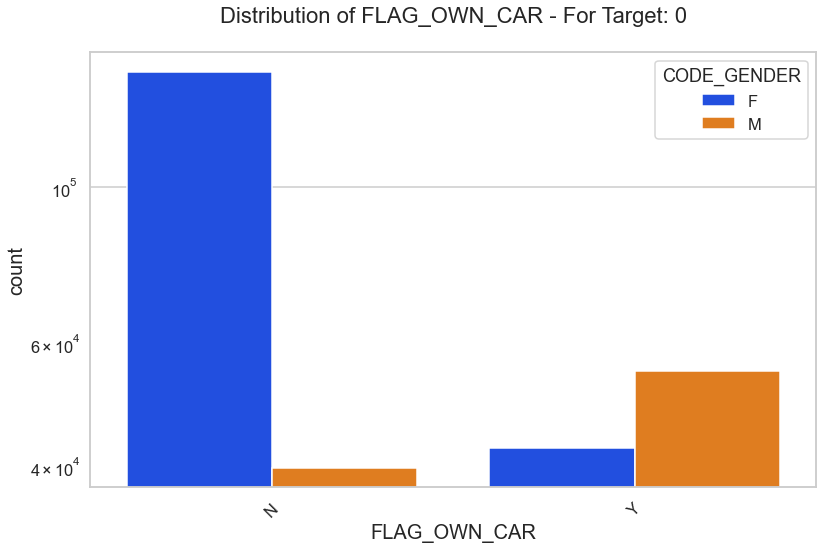

In [81]:
uniplot(target_0,col='FLAG_OWN_CAR',title='Distribution of FLAG_OWN_CAR - For Target: 0',hue='CODE_GENDER')

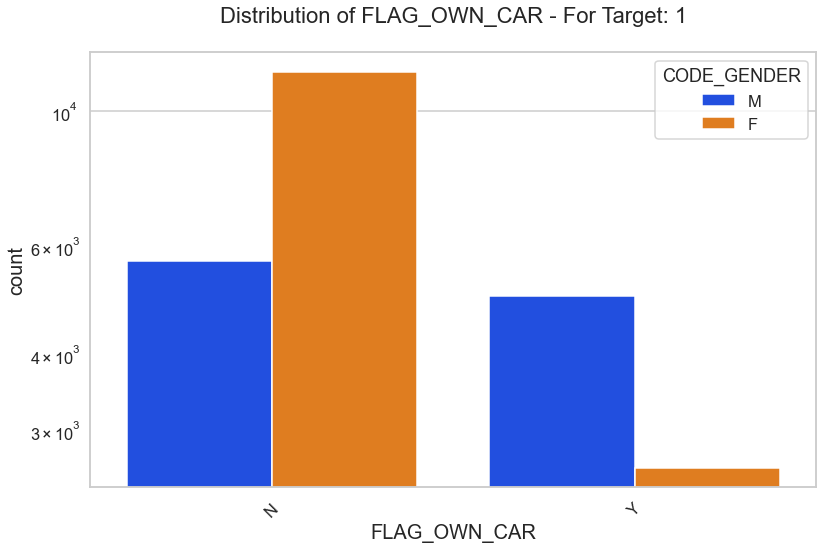

In [82]:
uniplot(target_1,col='FLAG_OWN_CAR',title='Distribution of FLAG_OWN_CAR - For Target: 1',hue='CODE_GENDER')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='FLAG_OWN_CAR'>

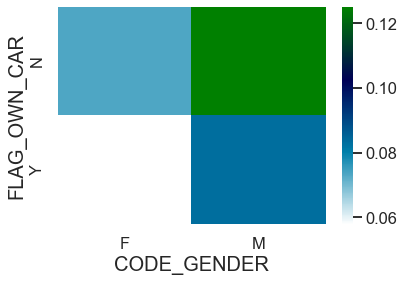

In [83]:
res = pd.pivot_table(data=DF, index='FLAG_OWN_CAR', columns='CODE_GENDER', values = 'TARGET')
sns.heatmap(res, annot=False, cmap="ocean_r")

In heat map male client without have own car are the highest default rate as compared to other 3 sub categories.
But as per the bar plot, overall people without cars are most defaulters but female clients without car are the most defaulters as compared to the male clients without cars.
Good insight 
.Overall people without cars are most defaultersand  females without car are the most defaulters as compared to the males without cars.

NAME_CONTRACT_TYPE

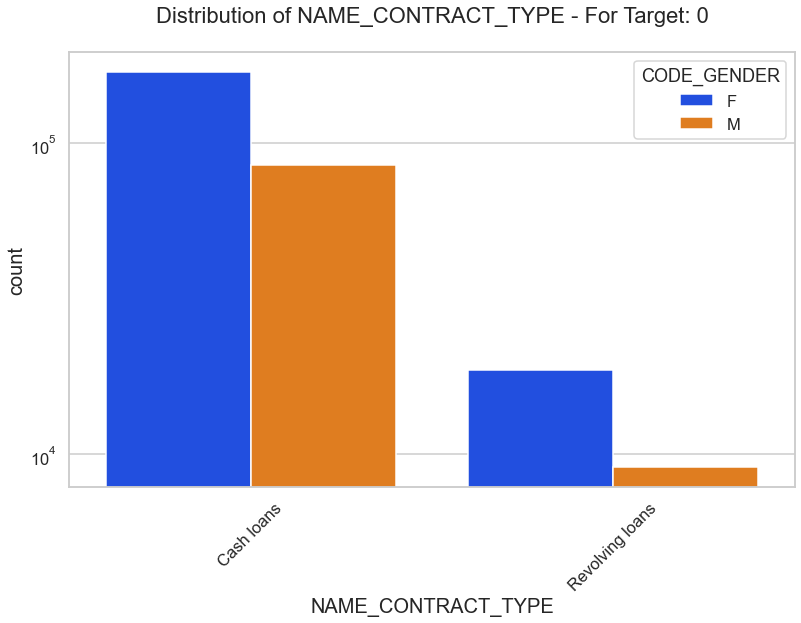

In [84]:
uniplot(target_0,col='NAME_CONTRACT_TYPE',title='Distribution of NAME_CONTRACT_TYPE - For Target: 0',hue='CODE_GENDER')

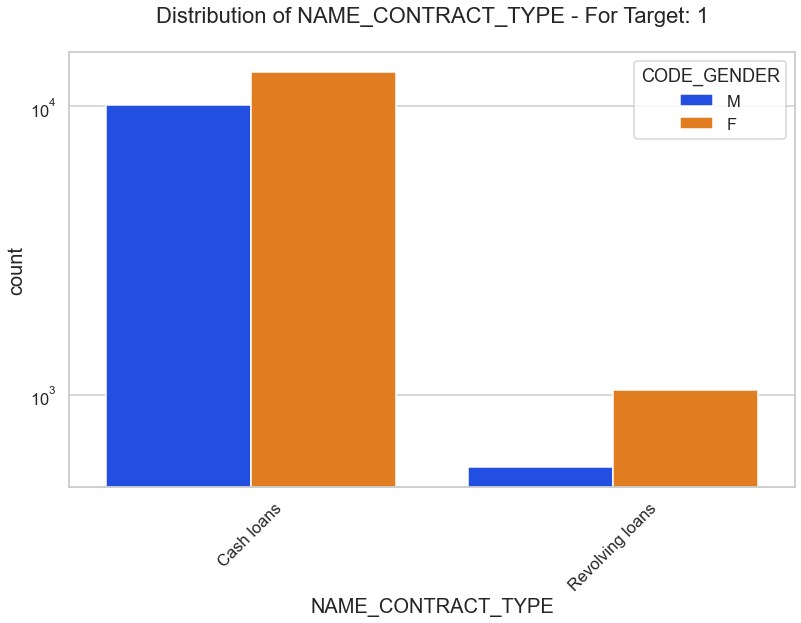

In [85]:
uniplot(target_1,col='NAME_CONTRACT_TYPE',title='Distribution of NAME_CONTRACT_TYPE - For Target: 1',hue='CODE_GENDER')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='NAME_CONTRACT_TYPE'>

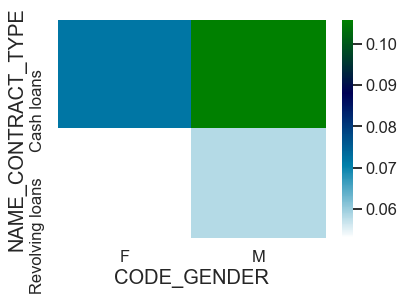

In [86]:
res = pd.pivot_table(data=DF, index='NAME_CONTRACT_TYPE', columns='CODE_GENDER', values = 'TARGET')
sns.heatmap(res, annot=False, cmap="ocean_r")

In heatmap male clients took loan is cash they are the highest default rate as compared to other 3 sub categories.
But as per the bar plot, overall people took loan is cash they are most defaulters but female clients who took loan is cash  are the most defaulters as compared to the male clients .
Good insight 
.Overall people took loan is cash they are  most defaulters .

NAME_INCOME_TYPE

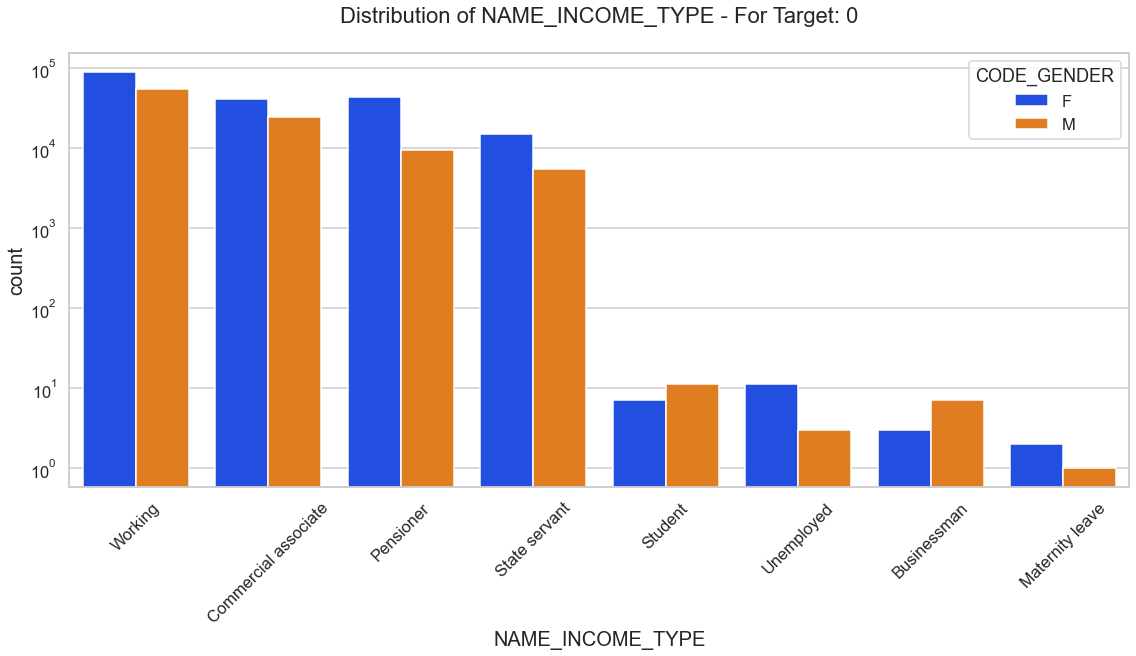

In [87]:

uniplot(target_0,col='NAME_INCOME_TYPE',title='Distribution of NAME_INCOME_TYPE - For Target: 0',hue='CODE_GENDER')

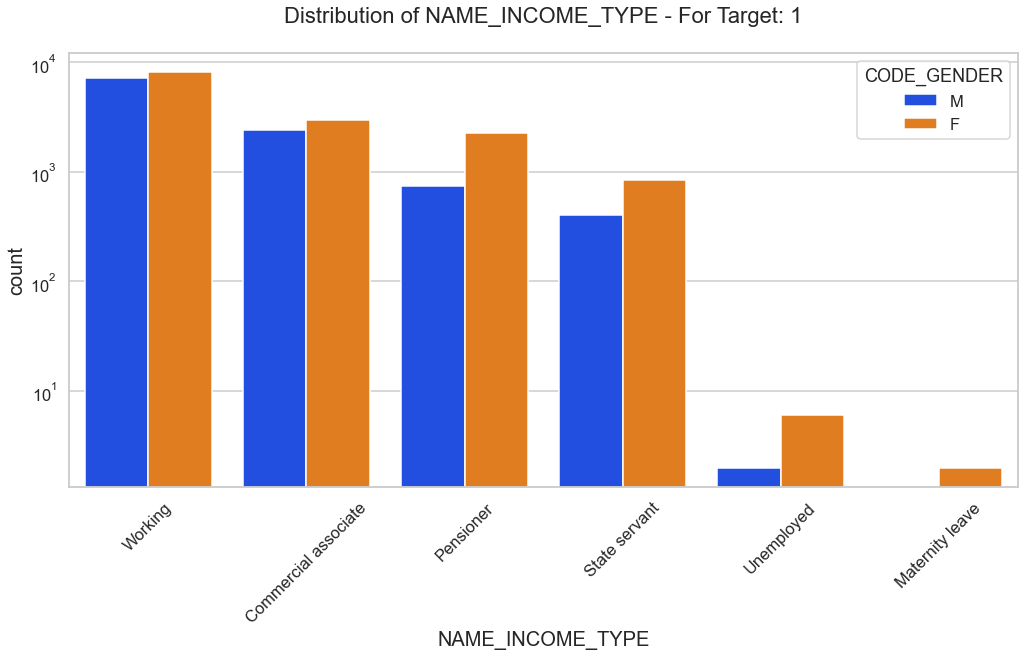

In [88]:
uniplot(target_1,col='NAME_INCOME_TYPE',title='Distribution of NAME_INCOME_TYPE - For Target: 1',hue='CODE_GENDER')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='NAME_INCOME_TYPE'>

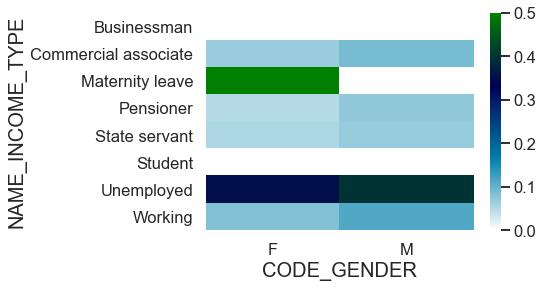

In [89]:
res = pd.pivot_table(data=DF, index='NAME_INCOME_TYPE', columns='CODE_GENDER', values = 'TARGET')
sns.heatmap(res, annot=False, cmap="ocean_r")

In heatmap female clients have maternity leave they have highest default rate as compared to other sub categories.
Both unemployed male and female client's are hightest defaulters.
student,businessman,pensioner have values is '0'.so they don't do any late payments.
In the case of bar plot females have hightest default rate as compared male.

ORGANIZATION_TYPE

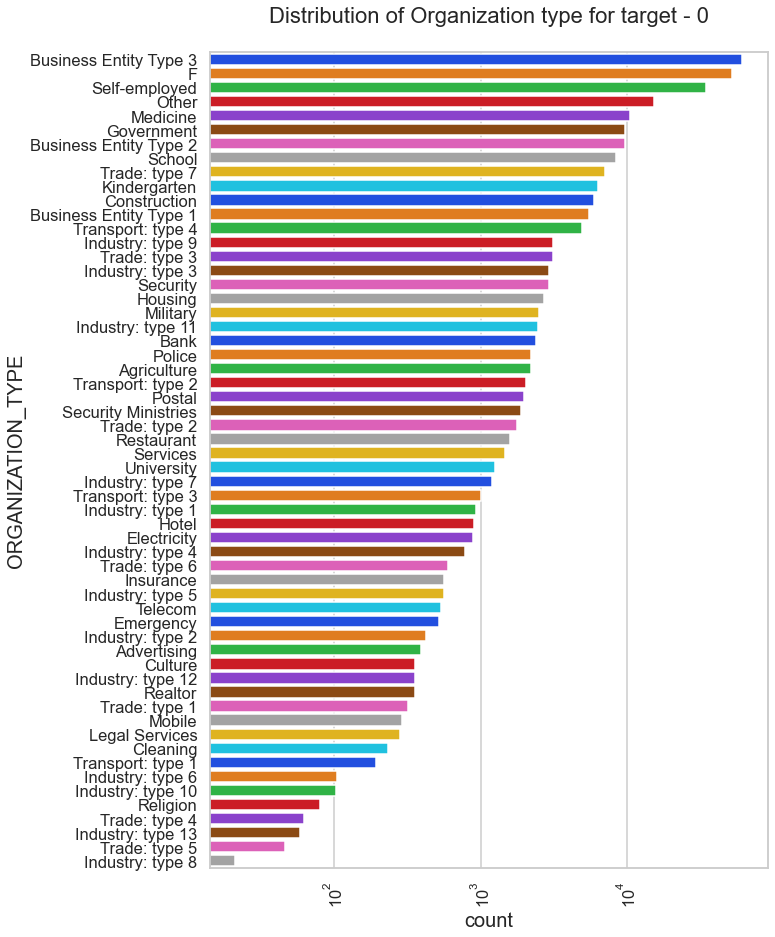

In [90]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10,15))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target_0,y='ORGANIZATION_TYPE',order=target_0['ORGANIZATION_TYPE'].value_counts().index,palette='bright')

plt.show()

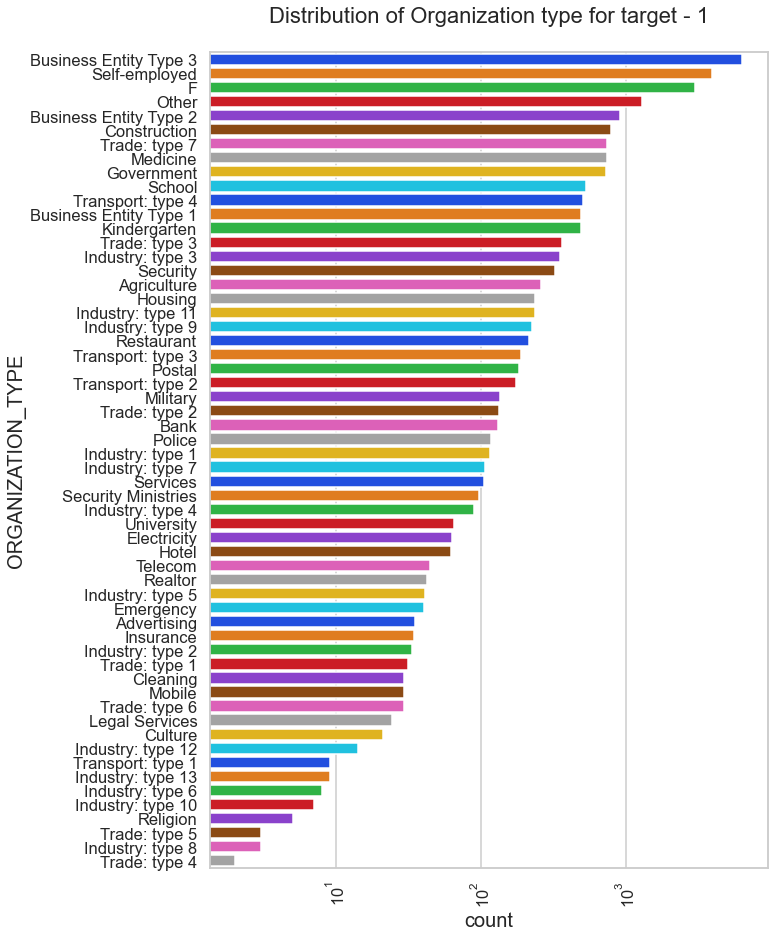

In [91]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10,15))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target_1,y='ORGANIZATION_TYPE',order=target_1['ORGANIZATION_TYPE'].value_counts().index,palette='bright')

plt.show()

<AxesSubplot:xlabel='CODE_GENDER', ylabel='ORGANIZATION_TYPE'>

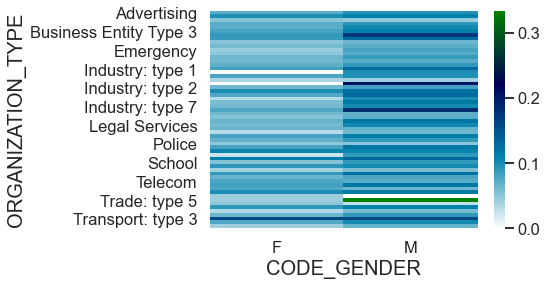

In [92]:
res = pd.pivot_table(data=DF, index='ORGANIZATION_TYPE', columns='CODE_GENDER', values = 'TARGET')
sns.heatmap(res, annot=False, cmap="ocean_r")

In heat map male in  Trade type 5 are  highest default rate as compared to other sub categories.
Clients which have applied for credits are from most of the organization type Business entity Type 3 , Self employed , Other , Medicine, Business entity Type 2 and Government.
Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.


# Analysis with numeric values

In [93]:
numeric= DF.describe()
numerical= numeric.columns
numeric

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,2.152665,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.513289
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.910682,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.192334
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390782
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.565467
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,3.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.663422
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,20.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.855000


In [94]:
numeric.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2'],
      dtype='object')

In [95]:
bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

DF['AMT_CREDIT_RANGE']=pd.cut(DF['AMT_CREDIT'],bins=bins,labels=slots)

In [96]:
bins = [0,100000,200000,300000,400000,500000,10000000000]
slot = ['0-100000','100000-200000','200000-300000','300000-400000','400000-500000','500000 and above']

DF['AMT_INCOME_RANGE']=pd.cut(DF['AMT_INCOME_TOTAL'],bins,labels=slot)



In [97]:
bins = [0,7300,10950,14600,18250,21900,25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

DF['AGE_RANGE']=pd.cut(DF['DAYS_BIRTH'],bins,labels=slot)

In [98]:
target_0.shape, target_1.shape

((282686, 36), (24825, 36))

Analyse continuous column with respect to the target column

AMT_CREDIT

Text(0.5, 1.0, 'AMT_CREDIT BY TARGET')

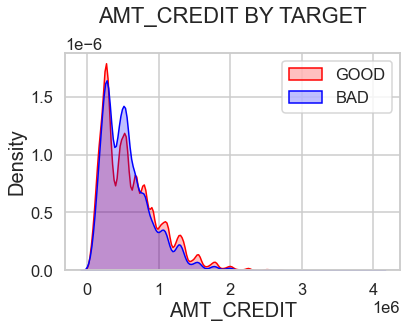

In [99]:
sns.kdeplot(DF.AMT_CREDIT[(DF["TARGET"] == 0) ],
                color="Red", shade = True)
sns.kdeplot(DF.AMT_CREDIT[(DF["TARGET"]== 1) ],
              color="Blue", shade= True)
plt.legend(["GOOD","BAD"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('AMT_CREDIT')
plt.title('AMT_CREDIT BY TARGET')

AMT_ANNUITY 

Text(0.5, 1.0, 'AMT_ANNUITY BY TARGET')

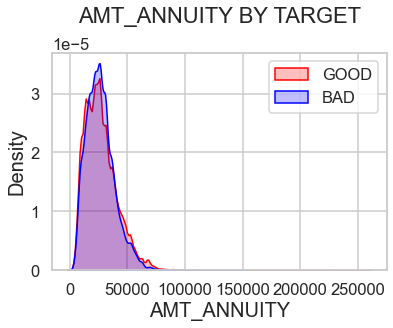

In [100]:
sns.kdeplot(DF.AMT_ANNUITY[(DF["TARGET"] == 0) ],
                color="Red", shade = True)
sns.kdeplot(DF.AMT_ANNUITY[(DF["TARGET"]== 1) ],
              color="Blue", shade= True)
plt.legend(["GOOD","BAD"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('AMT_ANNUITY')
plt.title('AMT_ANNUITY BY TARGET')

AMT_GOODS_PRICE

Text(0.5, 1.0, 'AMT_GOODS_PRICE BY TARGET')

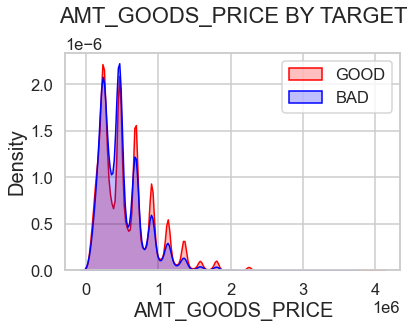

In [101]:
sns.kdeplot(DF.AMT_GOODS_PRICE[(DF["TARGET"] == 0) ],
                color="Red", shade = True)
sns.kdeplot(DF.AMT_GOODS_PRICE[(DF["TARGET"]== 1) ],
              color="Blue", shade= True)
plt.legend(["GOOD","BAD"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('AMT_GOODS_PRICE')
plt.title('AMT_GOODS_PRICE BY TARGET')

AMT_INCOME

Text(0.5, 1.0, 'AMT_INCOME BY TARGET')

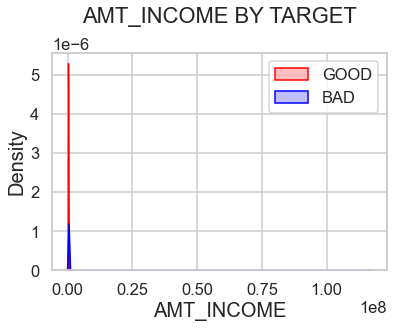

In [102]:
sns.kdeplot(DF.AMT_INCOME_TOTAL[(DF["TARGET"] == 0) ],
                color="Red", shade = True)
sns.kdeplot(DF.AMT_INCOME_TOTAL[(DF["TARGET"]== 1) ],
              color="Blue", shade= True)
plt.legend(["GOOD","BAD"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('AMT_INCOME')
plt.title('AMT_INCOME BY TARGET')

DAYS_REGISTRATION

Text(0.5, 1.0, 'DAYS_REGISTRATION BY TARGET')

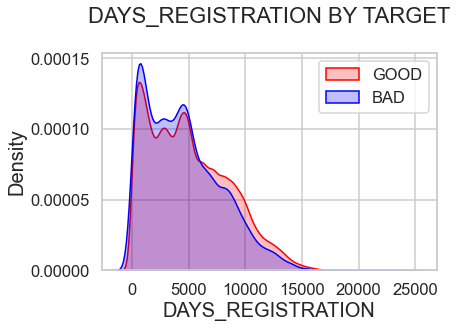

In [103]:
sns.kdeplot(DF.DAYS_REGISTRATION[(DF["TARGET"] == 0) ],
                color="Red", shade = True)
sns.kdeplot(DF.DAYS_REGISTRATION[(DF["TARGET"]== 1) ],
              color="Blue", shade= True)
plt.legend(["GOOD","BAD"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('DAYS_REGISTRATION')
plt.title('DAYS_REGISTRATION BY TARGET')

DAYS_ID_PUBLISH

Text(0.5, 1.0, 'DAYS_ID_PUBLISH BY TARGET')

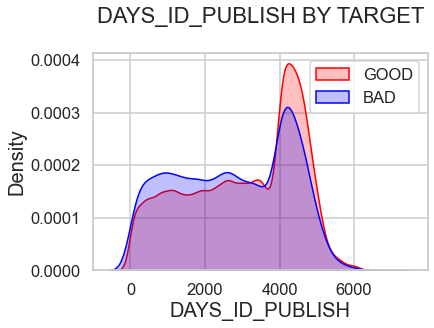

In [104]:
sns.kdeplot(DF.DAYS_ID_PUBLISH[(DF["TARGET"] == 0) ],
                color="Red", shade = True)
sns.kdeplot(DF.DAYS_ID_PUBLISH[(DF["TARGET"]== 1) ],
              color="Blue", shade= True)
plt.legend(["GOOD","BAD"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('DAYS_ID_PUBLISH')
plt.title('DAYS_ID_PUBLISH BY TARGET')

DAYS_EMPLOYED

Text(0.5, 1.0, 'DAYS_EMPLOYED BY TARGET')

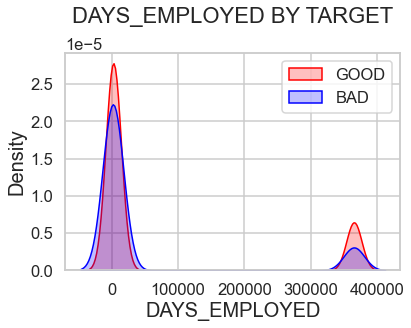

In [105]:
sns.kdeplot(DF.DAYS_EMPLOYED[(DF["TARGET"] == 0) ],
                color="Red", shade = True)
sns.kdeplot(DF.DAYS_EMPLOYED[(DF["TARGET"]== 1) ],
              color="Blue", shade= True)
plt.legend(["GOOD","BAD"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('DAYS_EMPLOYED')
plt.title('DAYS_EMPLOYED BY TARGET')

 Clients change their registration closer to application date, they are more likely to default.
Clients who change their identity documents closer to loan application are less reliable than those who change it in advance.
when the loan annuity is low the client are more likely to default.

AGE BY TARGET

Text(0.5, 1.0, 'DAYS_BIRTH BY TARGET')

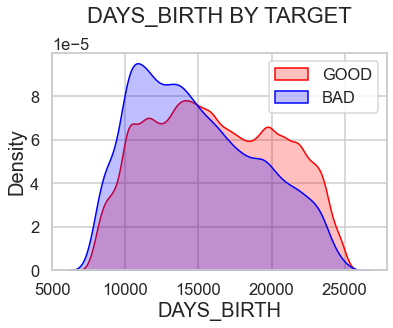

In [106]:
sns.kdeplot(DF.DAYS_BIRTH[(DF["TARGET"] == 0) ],
                color="Red", shade = True)
sns.kdeplot(DF.DAYS_BIRTH[(DF["TARGET"]== 1) ],
              color="Blue", shade= True)
plt.legend(["GOOD","BAD"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('DAYS_BIRTH')
plt.title('DAYS_BIRTH BY TARGET')

Here younger clients are less reliable compare to older clients.
as client get older more reliable.

AMT_INCOME_RANGE

In [107]:
DF.AMT_INCOME_RANGE.value_counts()

100000-200000       155898
200000-300000        65176
0-100000             63698
300000-400000        14676
400000-500000         5361
500000 and above      2702
Name: AMT_INCOME_RANGE, dtype: int64

<AxesSubplot:title={'center':'Target_0:Income Range'}, xlabel='AMT_INCOME_RANGE', ylabel='count'>

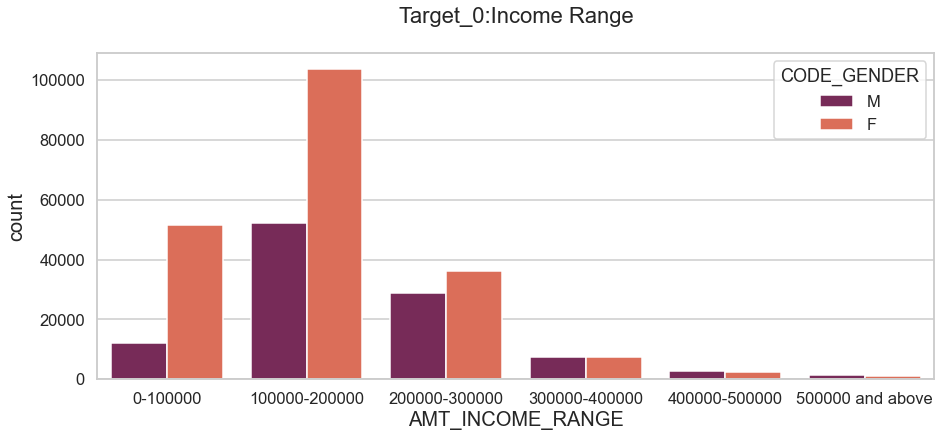

In [108]:
plt.figure(figsize=(15,6))
plt.title('Target_0:Income Range')
sns.countplot(x=DF.AMT_INCOME_RANGE, data=target_0,hue = DF.CODE_GENDER, palette='rocket')

<AxesSubplot:title={'center':'Target_1:Income Range'}, xlabel='AMT_INCOME_RANGE', ylabel='count'>

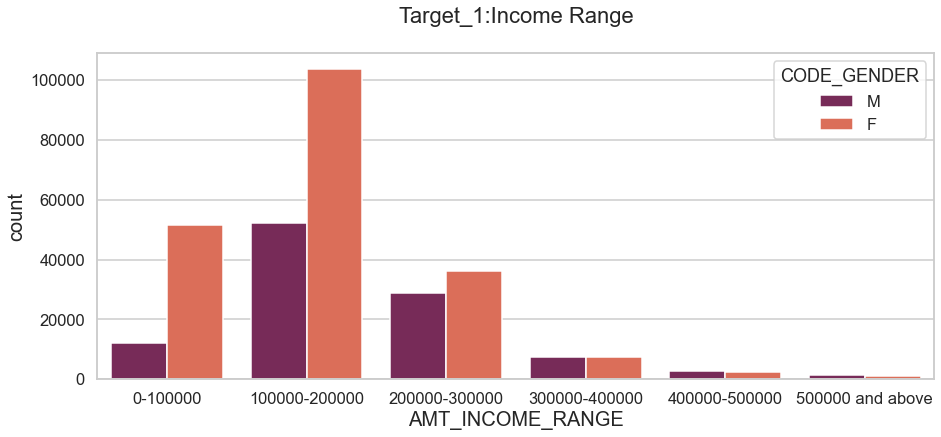

In [109]:
plt.figure(figsize=(15,6))
plt.title('Target_1:Income Range')
sns.countplot(x=DF.AMT_INCOME_RANGE, data=target_1,hue = DF.CODE_GENDER, palette='rocket')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='AMT_INCOME_RANGE'>

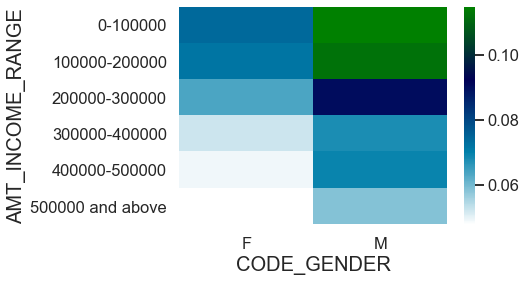

In [110]:
res = pd.pivot_table(data=DF, index='AMT_INCOME_RANGE', columns='CODE_GENDER', values = 'TARGET')
sns.heatmap(res, annot=False, cmap="ocean_r")

In above chart female have low income are more likely to default compare to  male clients.
Below 200000 income is having more credict.
above 400000 income is having less count.
As per the heat map male having below 300000 income are more likely to default.
Default rate is increasing when income are decrease.

AGE_RANGE

<AxesSubplot:title={'center':'Target_0:AGE_RANGE'}, xlabel='AGE_RANGE', ylabel='count'>

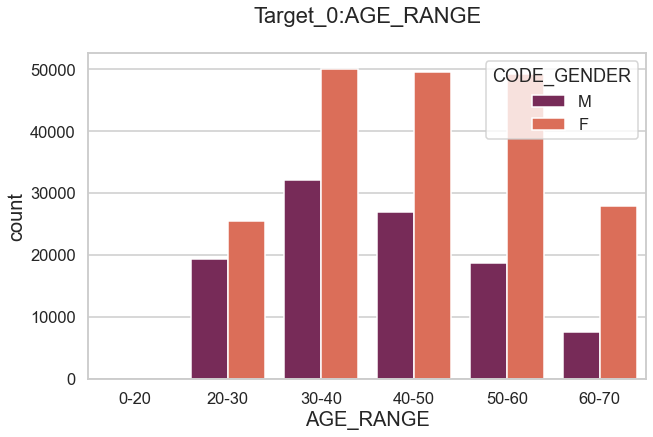

In [111]:
plt.figure(figsize=(10,6))
plt.title('Target_0:AGE_RANGE')
sns.countplot(x=DF.AGE_RANGE, data=target_0,hue = DF.CODE_GENDER, palette='rocket')

<AxesSubplot:title={'center':'Target_1:AGE_RANGE'}, xlabel='AGE_RANGE', ylabel='count'>

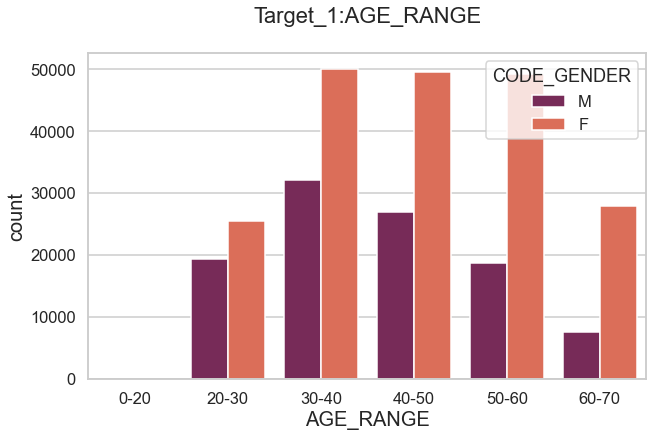

In [112]:
plt.figure(figsize=(10,6))
plt.title('Target_1:AGE_RANGE')
sns.countplot(x=DF.AGE_RANGE, data=target_1,hue = DF.CODE_GENDER, palette='rocket')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='AGE_RANGE'>

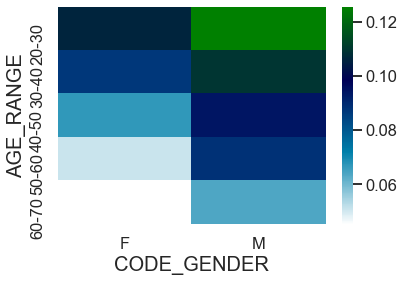

In [113]:
res = pd.pivot_table(data=DF, index='AGE_RANGE', columns='CODE_GENDER', values = 'TARGET')
sns.heatmap(res, annot=False, cmap="ocean_r")

In above chart age range from 30 to 60 is having more number of credits.
female clients are more than male clients.
Clients having below 30 age  and above 60 year have less credicts

 As per the heat map male having below 40 age are more likely to default. Default rate is increasing when age  decrease.
 Above 55 age female clients are more reliable.

AMT_CREDIT_RANGE

<AxesSubplot:title={'center':'Target_0:CREDIT_RANGE'}, xlabel='AMT_CREDIT_RANGE', ylabel='count'>

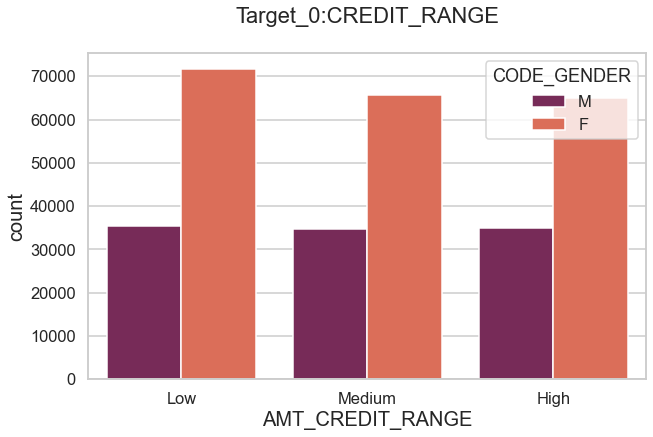

In [114]:
plt.figure(figsize=(10,6))
plt.title('Target_0:CREDIT_RANGE')
sns.countplot(x=DF.AMT_CREDIT_RANGE, data=target_0,hue = DF.CODE_GENDER, palette='rocket')

<AxesSubplot:title={'center':'Target_1:CREDIT_RANGE'}, xlabel='AMT_CREDIT_RANGE', ylabel='count'>

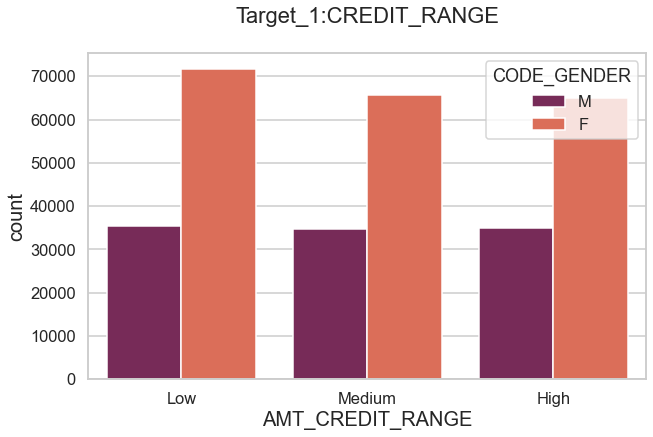

In [115]:
plt.figure(figsize=(10,6))
plt.title('Target_1:CREDIT_RANGE')
sns.countplot(x=DF.AMT_CREDIT_RANGE, data=target_1,hue = DF.CODE_GENDER, palette='rocket')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='AMT_CREDIT_RANGE'>

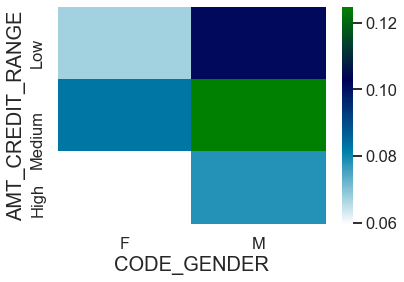

In [116]:
res = pd.pivot_table(data=DF, index='AMT_CREDIT_RANGE', columns='CODE_GENDER', values = 'TARGET')
sns.heatmap(res, annot=False, cmap="ocean_r")

In bar plot credit range is low or medium or high female clients are more likely to default.
In heat map male clients have medium credit they are more likely to default compare to other sub category.

CNT_CHILDREN

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


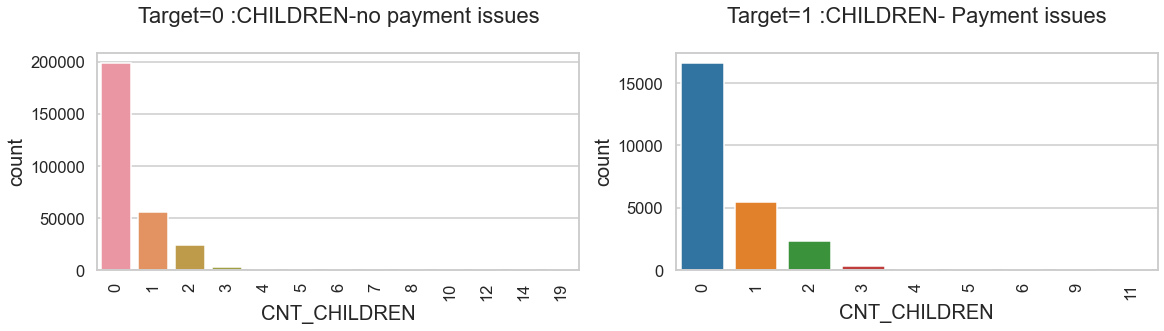

In [117]:
plt.figure(figsize = (19,4))
plt.subplot(1, 2, 1)
sns.countplot(target_0['CNT_CHILDREN'])
plt.title('Target=0 :CHILDREN-no payment issues')
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)
sns.countplot(target_1['CNT_CHILDREN'])
plt.title('Target=1 :CHILDREN- Payment issues')
plt.xticks(rotation = 90)
plt.show()

 Client have 3 kids they are more likely to default compare to others.
Most clients have no or very few children and are likely to repay loan on time.

CNT_FAM_MEMBERS

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


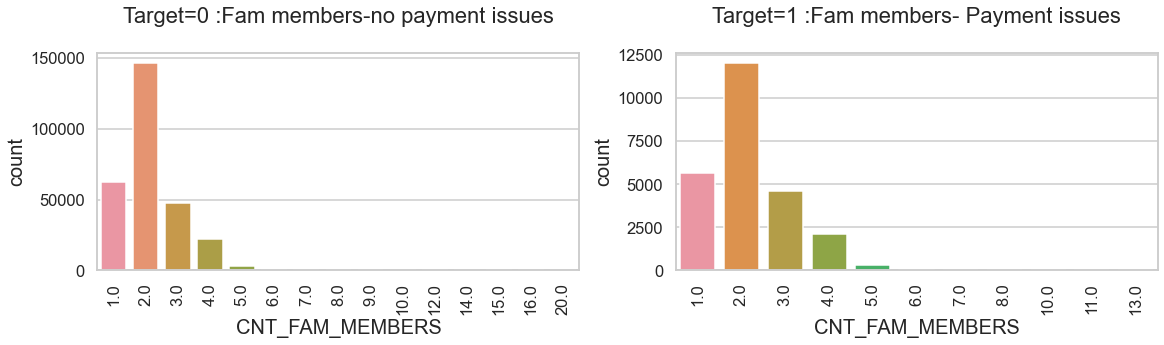

In [118]:
plt.figure(figsize = (19,4))
plt.subplot(1, 2, 1)
sns.countplot(target_0['CNT_FAM_MEMBERS'])
plt.title('Target=0 :Fam members-no payment issues')
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)
sns.countplot(target_1['CNT_FAM_MEMBERS'])
plt.title('Target=1 :Fam members- Payment issues')
plt.xticks(rotation = 90)
plt.show()

 less  member in family are more reliable . Increasing members in family increase the deafult.

# Correlations

In [119]:
DFD = pd.get_dummies(DF, drop_first=True)

In [120]:
correlations = DF.corr()['TARGET'].sort_values()
print('Top 10 Positive Correlations:\n', correlations.tail(10))
print('\nTop 10 Negative Correlations:\n', correlations.head(10))

Top 10 Positive Correlations:
 SK_ID_CURR                    -0.002108
LIVE_REGION_NOT_WORK_REGION    0.002819
REG_REGION_NOT_LIVE_REGION     0.005576
REG_REGION_NOT_WORK_REGION     0.006942
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
LIVE_CITY_NOT_WORK_CITY        0.032518
REG_CITY_NOT_LIVE_CITY         0.044395
REG_CITY_NOT_WORK_CITY         0.050994
TARGET                         1.000000
Name: TARGET, dtype: float64

Top 10 Negative Correlations:
 EXT_SOURCE_2                 -0.159030
DAYS_BIRTH                   -0.078239
DAYS_ID_PUBLISH              -0.051457
DAYS_EMPLOYED                -0.047046
DAYS_REGISTRATION            -0.041975
AMT_GOODS_PRICE              -0.039623
REGION_POPULATION_RELATIVE   -0.037227
AMT_CREDIT                   -0.030369
HOUR_APPR_PROCESS_START      -0.024166
AMT_ANNUITY                  -0.012815
Name: TARGET, dtype: float64


In [121]:
DF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,Medium,200000-300000,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,0.622246,High,200000-300000,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.555912,Low,0-100000,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,Low,100000-200000,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,Medium,100000-200000,50-60


External source2 has highest correlation value with the target.

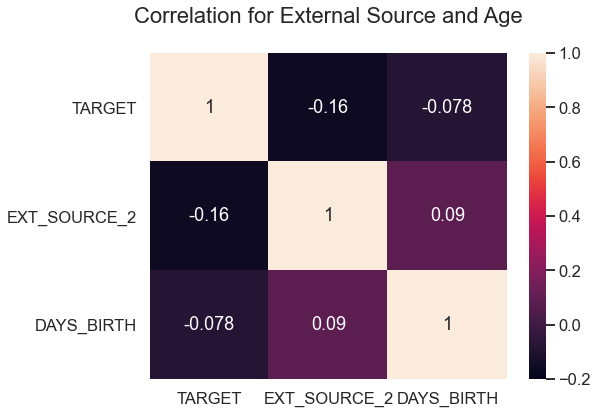

In [122]:

ext = DF[['TARGET', 'EXT_SOURCE_2','DAYS_BIRTH']]
ext_corrs = ext.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(ext_corrs, vmin = -0.2, annot = True)
plt.title('Correlation for External Source and Age');

External source has negative correlations with the target, the value of the EXT_SOURCE2 increases, the client is more likely to repay the loan.
DAYS_BIRTH is positively correlated with EXT_SOURCE_2 ,age of client is increases Normalized score from external data source.

Text(0.5, 1.0, 'EXT_SOURCE_2 BY TARGET')

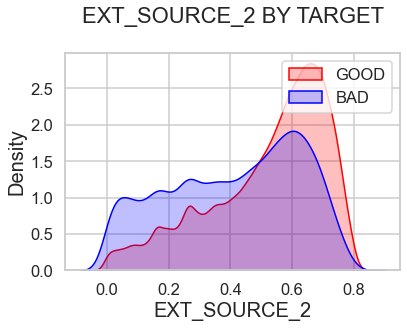

In [123]:
sns.kdeplot(DF.EXT_SOURCE_2[(DF["TARGET"] == 0) ],
                color="Red", shade = True)
sns.kdeplot(DF.EXT_SOURCE_2[(DF["TARGET"]== 1) ],
              color="Blue", shade= True)
plt.legend(["GOOD","BAD"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('EXT_SOURCE_2')
plt.title('EXT_SOURCE_2 BY TARGET')

Normalized score from external data source 2 is increase ,then most of the client repay the loan. 

REG_REGION_NOT_LIVE_REGION

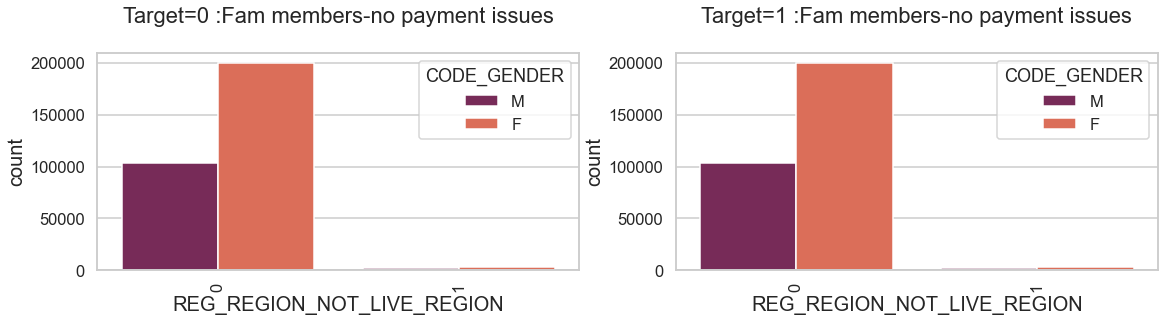

In [124]:
plt.figure(figsize = (19,4))
plt.title('Target_1:Income Range')
plt.subplot(1, 2, 1)
sns.countplot(x=DF.REG_REGION_NOT_LIVE_REGION, data=target_0,hue = DF.CODE_GENDER, palette='rocket')
plt.title('Target=0 :Fam members-no payment issues')
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)
sns.countplot(x=DF.REG_REGION_NOT_LIVE_REGION, data=target_1,hue = DF.CODE_GENDER, palette='rocket')
plt.title('Target=1 :Fam members-no payment issues')

plt.xticks(rotation = 90)
plt.show()


<AxesSubplot:xlabel='CODE_GENDER', ylabel='REG_REGION_NOT_LIVE_REGION'>

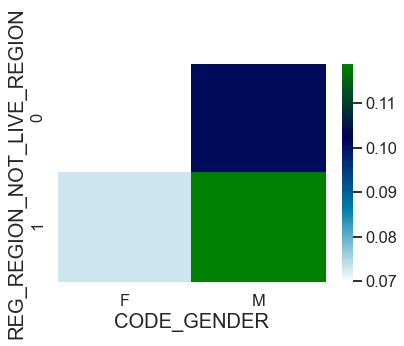

In [125]:
res = pd.pivot_table(data=DF, index='REG_REGION_NOT_LIVE_REGION', columns='CODE_GENDER', values = 'TARGET')
sns.heatmap(res, annot=False, cmap="ocean_r")

'REG_REGION_NOT_LIVE_REGION'= Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
Male ,client's permanent address does not match contact address,they are more default comapre to others.hence less reliable

REG_REGION_NOT_WORK_REGION

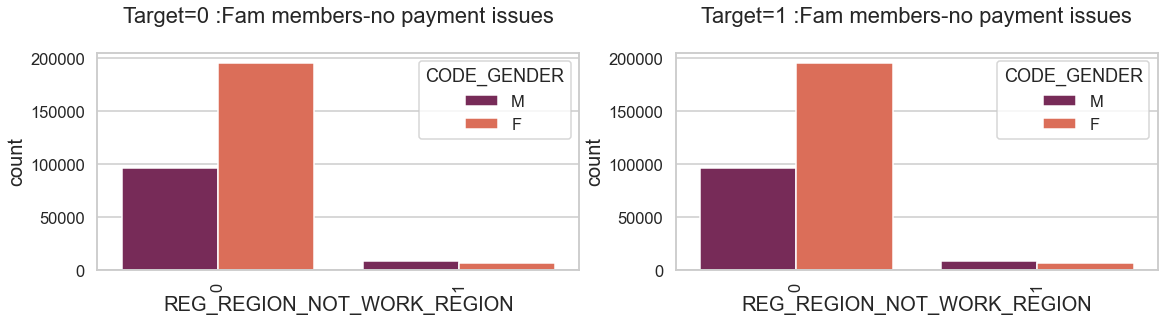

In [126]:
plt.figure(figsize = (19,4))
plt.title('Target_1:Income Range')
plt.subplot(1, 2, 1)
sns.countplot(x=DF.REG_REGION_NOT_WORK_REGION, data=target_0,hue = DF.CODE_GENDER, palette='rocket')
plt.title('Target=0 :Fam members-no payment issues')
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)
sns.countplot(x=DF.REG_REGION_NOT_WORK_REGION, data=target_1,hue = DF.CODE_GENDER, palette='rocket')
plt.title('Target=1 :Fam members-no payment issues')

plt.xticks(rotation = 90)
plt.show()


<AxesSubplot:xlabel='CODE_GENDER', ylabel='REG_REGION_NOT_WORK_REGION'>

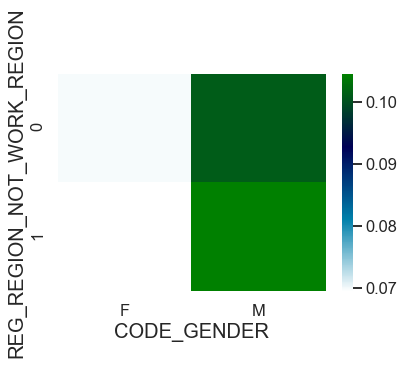

In [127]:
res = pd.pivot_table(data=DF, index='REG_REGION_NOT_WORK_REGION', columns='CODE_GENDER', values = 'TARGET')
sns.heatmap(res, annot=False, cmap="ocean_r")

REG_REGION_NOT_WORK_REGION'= Flag if client's permanent address does not match work address (1=different, 0=same, at region level) .As per the heat map male client's permanent address does not match work address they are more default
female clients are more reliable compare to male clients.

REG_CITY_NOT_LIVE_CITY

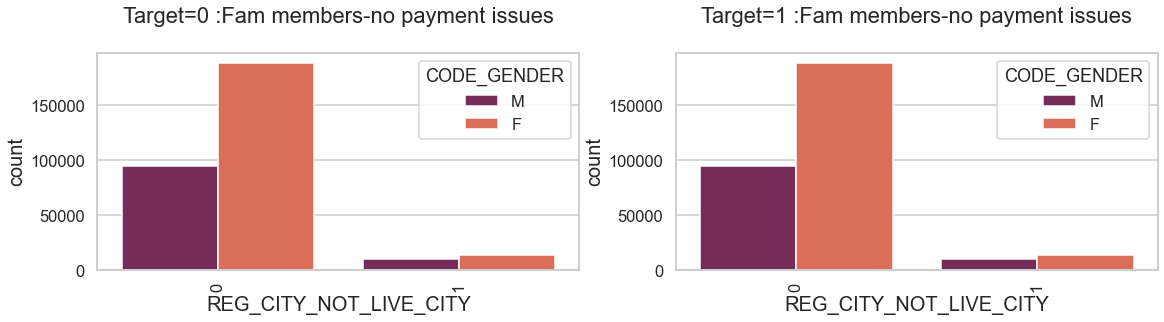

In [128]:
plt.figure(figsize = (19,4))
plt.title('Target_1:Income Range')
plt.subplot(1, 2, 1)
sns.countplot(x=DF.REG_CITY_NOT_LIVE_CITY, data=target_0,hue = DF.CODE_GENDER, palette='rocket')
plt.title('Target=0 :Fam members-no payment issues')
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)
sns.countplot(x=DF.REG_CITY_NOT_LIVE_CITY, data=target_1,hue = DF.CODE_GENDER, palette='rocket')
plt.title('Target=1 :Fam members-no payment issues')

plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='CODE_GENDER', ylabel='REG_CITY_NOT_LIVE_CITY'>

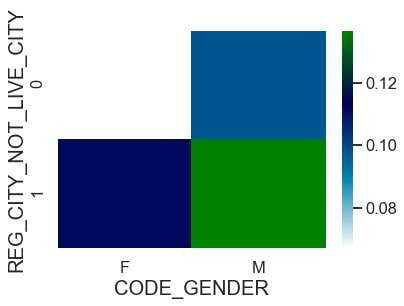

In [129]:
res = pd.pivot_table(data=DF, index='REG_CITY_NOT_LIVE_CITY', columns='CODE_GENDER', values = 'TARGET')
sns.heatmap(res, annot=False, cmap="ocean_r")

REG_CITY_NOT_LIVE_CITY:Flag if client's permanent address does not match contact address ,1=different, 0=same.
As per the heat map both female and male client's permanent address does not match contact address they are more default.


'REG_CITY_NOT_WORK_CITY'

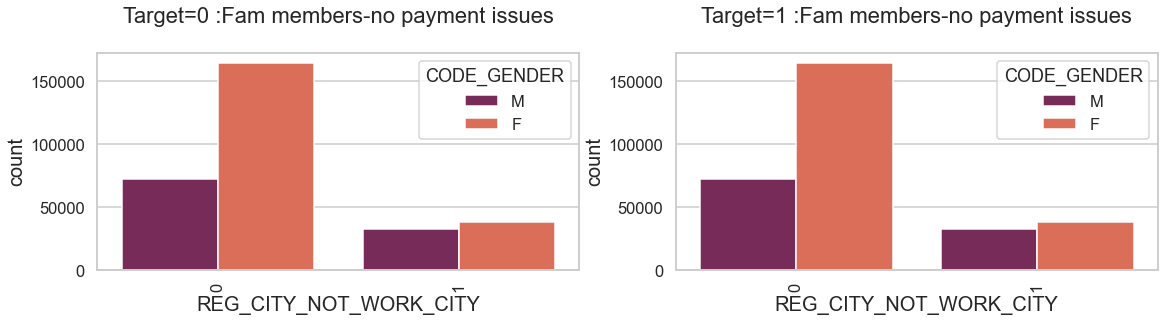

In [130]:
plt.figure(figsize = (19,4))
plt.title('Target_1:Income Range')
plt.subplot(1, 2, 1)
sns.countplot(x=DF.REG_CITY_NOT_WORK_CITY, data=target_0,hue = DF.CODE_GENDER, palette='rocket')
plt.title('Target=0 :Fam members-no payment issues')
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)
sns.countplot(x=DF.REG_CITY_NOT_WORK_CITY, data=target_1,hue = DF.CODE_GENDER, palette='rocket')
plt.title('Target=1 :Fam members-no payment issues')

plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='CODE_GENDER', ylabel='REG_CITY_NOT_WORK_CITY'>

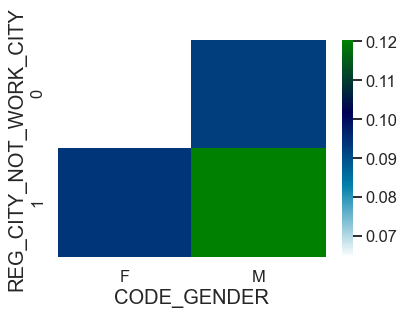

In [131]:
res = pd.pivot_table(data=DF, index='REG_CITY_NOT_WORK_CITY', columns='CODE_GENDER', values = 'TARGET')
sns.heatmap(res, annot=False, cmap="ocean_r")

REG_CITY_NOT_WORK_CITY:Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
As per the heat map male client's permanent address does not match work address ,they are more default.

# previousdata reading

In [132]:
pdf= pd.read_csv('previous_application.csv')
pdf.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
len(set(pdf['SK_ID_CURR']))

305828

In [134]:
len(set(pdf['SK_ID_PREV']))

1048575

Contract status

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

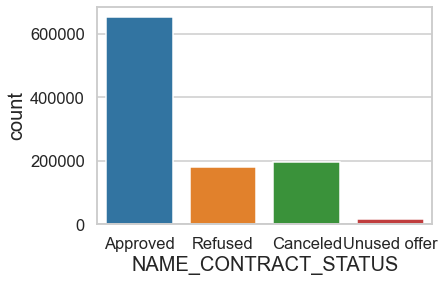

In [135]:
sns.countplot(data=pdf, x='NAME_CONTRACT_STATUS')

most of them approved.

contract status by contract type

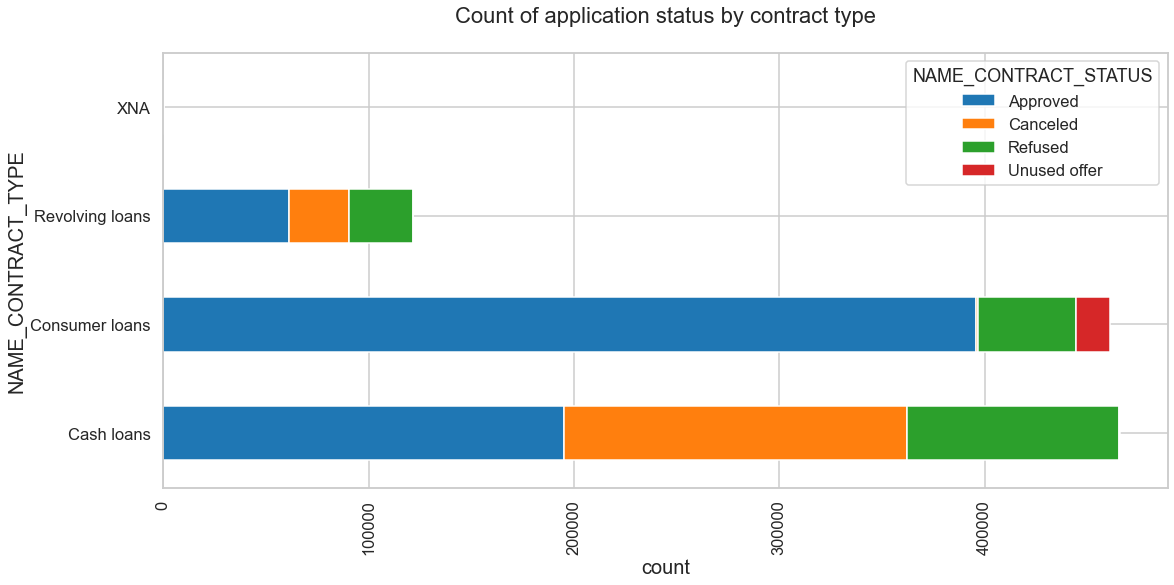

In [136]:
relation= pd.crosstab(pdf['NAME_CONTRACT_TYPE'],pdf['NAME_CONTRACT_STATUS'])
ax = relation.plot(kind="barh",figsize=(18,8),stacked=True)
plt.xticks(rotation=90)
plt.xlabel("count")
plt.title("Count of application status by contract type")
plt.show()

Consumer loan applications are most approved loans and cash loans are most cancelled and refused loans.
Consumer loans also rarely cancel, they are the most reliable type.

CODE_REJECT_REASON

<AxesSubplot:xlabel='CODE_REJECT_REASON', ylabel='count'>

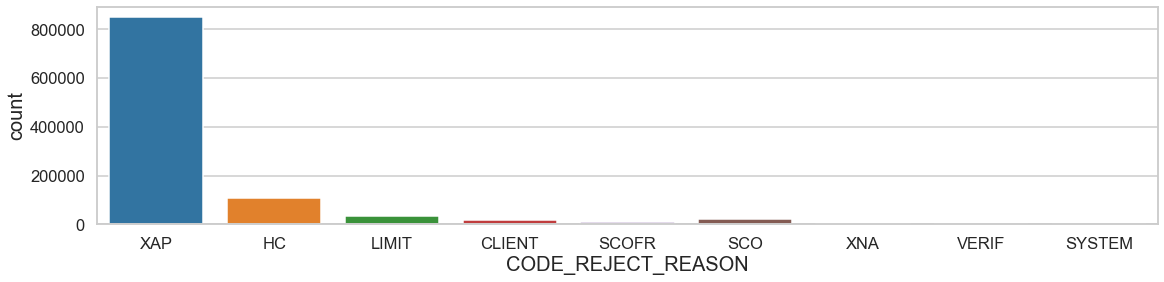

In [137]:
plt.figure(figsize = (19,4))
sns.countplot(data=pdf, x='CODE_REJECT_REASON')

Around 81% of rejected applications the reason is XAP so the reason may not be applicable.
Next significant reason is HC.

Client payment methods

<AxesSubplot:xlabel='NAME_PAYMENT_TYPE', ylabel='count'>

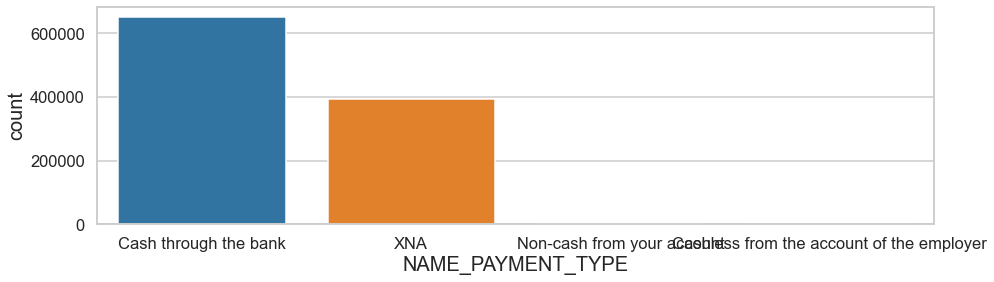

In [138]:
plt.figure(figsize = (15,4))
sns.countplot(data=pdf, x='NAME_PAYMENT_TYPE')

Most pepole are pay cash throught the bank

In [139]:
#Removing the column values of 'XNA' and 'XAP'

pdf=pdf.drop(pdf[pdf['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pdf=pdf.drop(pdf[pdf['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pdf=pdf.drop(pdf[pdf['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

Merging applications data along with the previous applications data for better insights

In [140]:
ndf=pd.merge(left=DF,right=pdf,how='inner',on='SK_ID_CURR',suffixes='_x')

<ipython-input-140-47047a2953ee>:1: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  ndf=pd.merge(left=DF,right=pdf,how='inner',on='SK_ID_CURR',suffixes='_x')


In [141]:
ndf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,Laborers,2.0,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,Medium,200000-300000,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Drivers,3.0,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,High,300000-400000,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
2,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,Medium,100000-200000,40-50,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,MONDAY,13,Y,1,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
3,100053,0,Cash loans,F,N,Y,0,202500.0,305221.5,17649.0,252000.0,Family,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.019689,20373,365243,7760.0,1993,Laborers,1.0,MONDAY,8,0,0,0,0,0,0,F,0.247665,Low,200000-300000,50-60,2572058,Cash loans,9636.705,90000.0,121968.0,NaN,90000.0,WEDNESDAY,7,Y,1,NaN,NaN,NaN,Other,Approved,-649,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,365243.0,-619.0,71.0,-349.0,-325.0,1.0
4,100060,0,Cash loans,M,Y,N,0,76500.0,454500.0,14661.0,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,12282,778,1824.0,1992,Laborers,2.0,TUESDAY,10,0,0,0,0,0,0,Emergency,0.705947,Medium,0-100000,30-40,1191663,Cash loans,12177.000,180000.0,180000.0,NaN,180000.0,FRIDAY,13,Y,1,NaN,NaN,NaN,Repairs,Approved,-466,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,36.0,high,Cash Street: high,365243.0,-436.0,614.0,

In [142]:
ndf1 = ndf.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [143]:
ndf1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [144]:
ndf1.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,Laborers,2.0,Business Entity Type 3,0.479987,Medium,200000-300000,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Drivers,3.0,Self-employed,0.321745,High,300000-400000,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
2,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,2.0,Business Entity Type 3,0.738053,Medium,100000-200000,40-50,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
3,0,Cash loans,F,N,Y,0,202500.0,305221.5,17649.0,252000.0,Family,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.019689,20373,365243,7760.0,1993,Laborers,1.0,F,0.247665,Low,200000-300000,50-60,2572058,Cash loans,9636.705,90000.0,121968.0,NaN,90000.0,NaN,NaN,NaN,Other,Approved,-649,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,365243.0,-619.0,71.0,-349.0,-325.0,1.0
4,0,Cash loans,M,Y,N,0,76500.0,454500.0,14661.0,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,12282,778,1824.0,1992,Laborers,2.0,Emergency,0.705947,Medium,0-100000,30-40,1191663,Cash loans,12177.000,180000.0,180000.0,NaN,180000.0,NaN,NaN,NaN,Repairs,Approved,-466,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,36.0,high,Cash Street: high,365243.0,-436.0,614.0,-316.0,-310.0,0.0


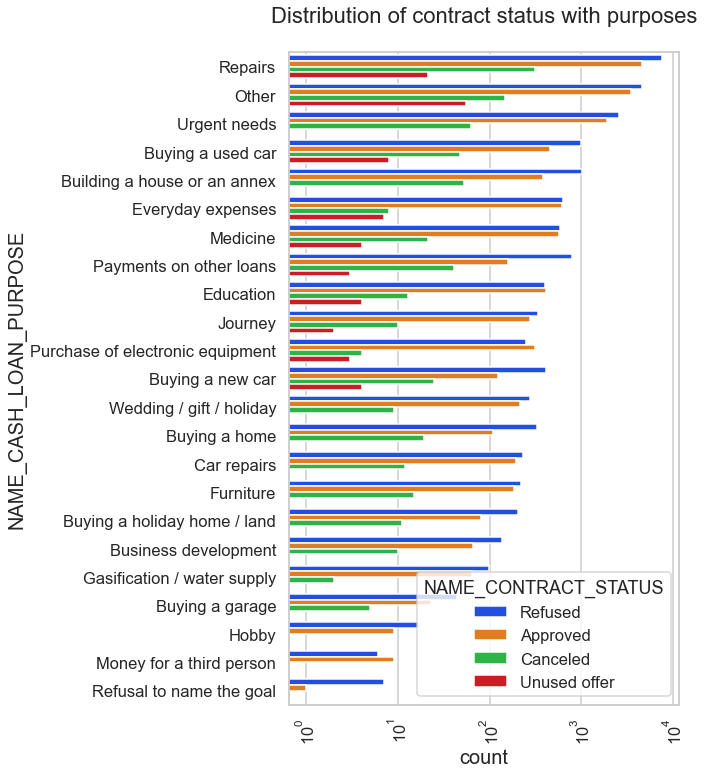

In [145]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(7,12))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = ndf1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=ndf1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='bright') 

Most rejection of loan came from repairs ,other and urgent needs.
Every day expenses, medicine and education have same number of rejection and aprroves.Paying other loans and buying a new car is having  higher rejection than approvals

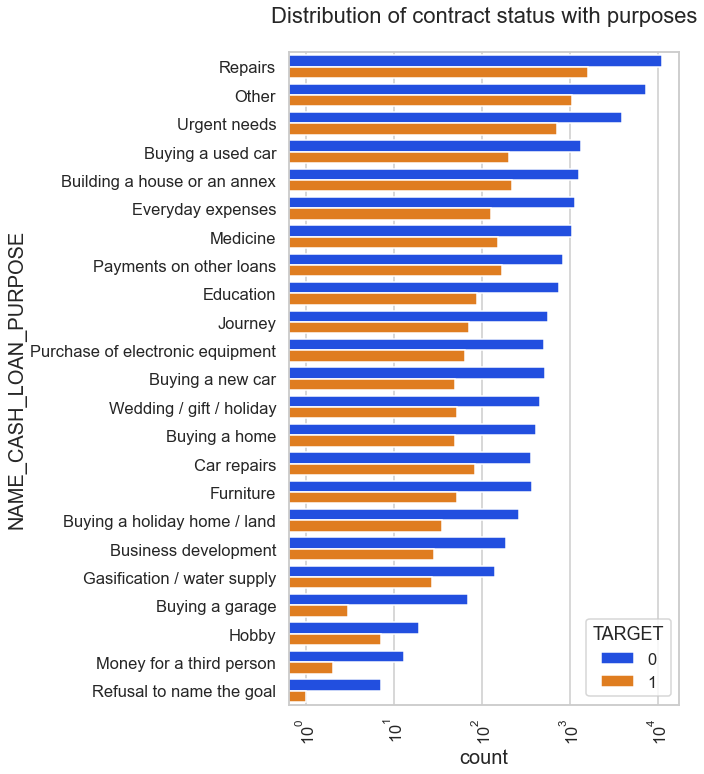

In [146]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(7,12))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = ndf1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=ndf1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='bright') 

Loan purposes with repairs ,other and urgent needs are facing more difficulties for repay the loan.
And some laces where loan payment is significant higher than facing difficulties. They are car repairs,payment on other loans,education and buying a garage.

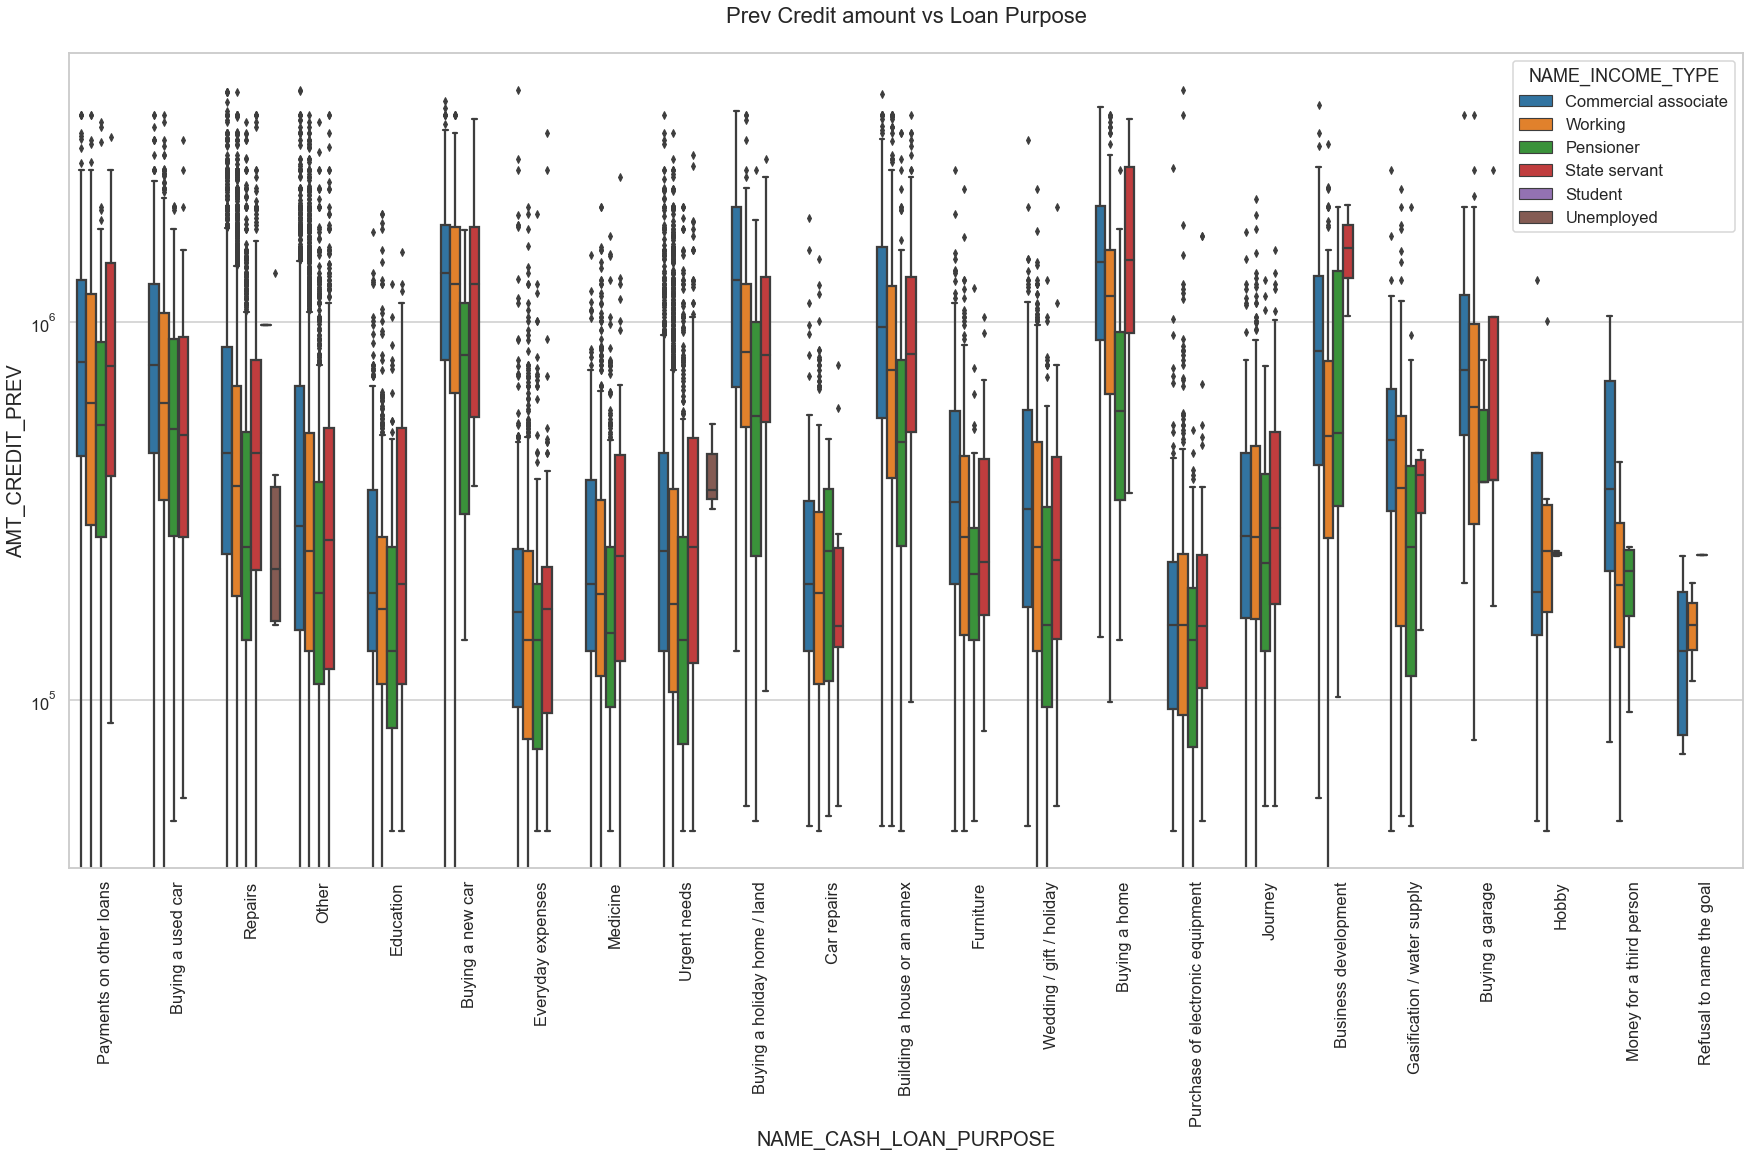

In [147]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.yscale('log')

sns.boxplot(data =ndf1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

Buying a new car,buying a holiday home,buying a home and building a house or an annex are higher credict.Money for third person or a Hobby is having less credits applied for.

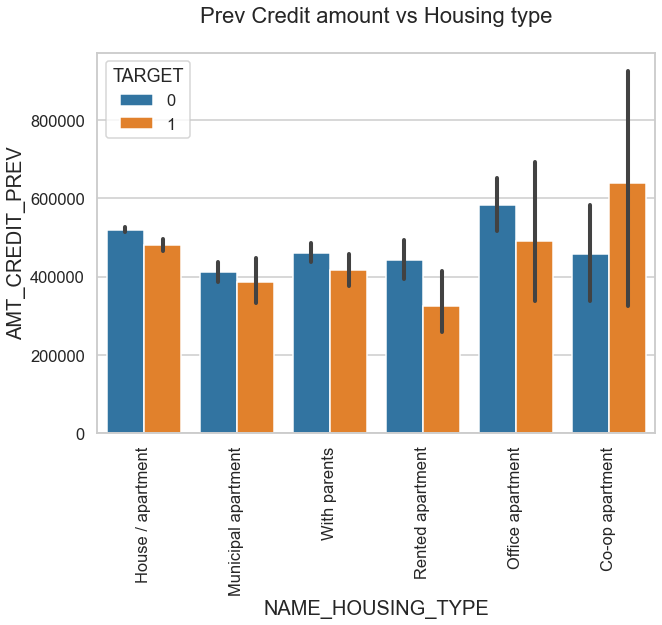

In [148]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data =ndf1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE',)
plt.title('Prev Credit amount vs Housing type')
plt.show()

Co-op apartment having highter credit of target 1.House/apartment,office apartment is having higher credit of target 0.That means co-op apartment housing type are more default. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment.Bank can focus mostly on housing type with parents or office apartment or House\apartment or municipal apartment for successful payments.

# CONCLUSION

1. Banks should focus more on contract type ‘Student’ ,’Pensioner’ and ‘Businessman with housing type with parents or office        apartment or House\apartment or municipal apartment for successful payments.

2. Accountant,high skill tech staff, manager and sales staff are more reliable.

3. Clients have more income and better occupation lesser chance to defaulting.

4. Male client's are moe default than female client's.

5. Loan purposes with repairs ,other and urgent needs are facing more difficulties for repay the loan.

6. External source has negative correlations with the target, the value of the EXT_SOURCE2 increases, the client is more likely    to repay the loan. DAYS_BIRTH is positively correlated with EXT_SOURCE_2 ,age of client is increases Normalized score from      external data source.

7. client's giving different address are more default.

8. client's having own flat and car they are more reliable comapre to client's don't have car and falt their own.
9. client's are unemployed,Commercial associates, Working & State servants are mostly defaulters.